<a href="https://colab.research.google.com/github/aarsh121/Bank-Defaulters/blob/main/Bank_Defaulters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction:**

This case study aims to give an idea of applying EDA in a real business scenario. In this case study, we will develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

**Business Understanding:**

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.
When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:



*   If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
*   If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:



*   **The client with payment difficulties:** he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample.
*   **All other cases:** All other cases when the payment is paid on time.

When a client applies for a loan, there are four types of decisions that could be taken by the client/company:

1. **Approved:** The Company has approved loan Application

1. **Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.

2. **Refused:** The company had rejected the loan (because the client does not meet their requirements etc.)

3. **Unused offer:** Loan has been cancelled by the client but on different stages of the process

**Business Objective:**

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.
In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default. The company can utilise this knowledge for its portfolio and risk assessment.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
import itertools
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

**Importing the input files**

In [ ]:
appDF=pd.read_csv('/content/drive/MyDrive/Bank Loan Defaulter/application_data.csv')
prevDF=pd.read_csv('/content/drive/MyDrive/Bank Loan Defaulter/previous_application.csv')

In [ ]:
appDF.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI FONDKAPREMONT_MODE  HOUSETYPE_MODE  TOTALAREA_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369                0.0202          0.0190                   0.0000             0.0000           0.0252             0.0383                        0.9722            0.6341           0.0144          0.0000          0.0690          0.0833          0.1250         0.0377                  0.022           0.0198                       0.0                 0.0           0.0250             0.0369                        0.9722            0.6243           0.0144            0.00          0.0690          0.0833          0.1250         0.0375                 0.0205           0.0193                    0.0000                0.00   reg oper account  block of flats          0.0149       Stone, brick       

In [ ]:
prevDF.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0               0.0          17145.0                   SATURDAY                       15                           Y                       1                0.0               0.182832                  0.867336                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest            365243.0           -42.0                      300.0          -42.0             -37.0                        0.0
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0               NaN         607500.0                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low            365243.0          -134.0                      916.0       365243.0          365243.0                        1.0
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5               NaN         112500.0                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high            365243.0          -271.0                       59.0       365243.0          365243.0                        1.0
3     2819243      176158         Cash loans    47041.335         450000.0    470790.0               NaN         450000.0                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0           middle       Cash X-Sell: middle            365243.0          -482.0                     -152.0         -182.0            -177.0                        1.0
4     1784265      202054         Cash loans    31924.395         337500.0    404055.0               NaN         337500.0                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [ ]:
# Database dimension
print("Database dimension - applicationDF     :",appDF.shape)
print("Database dimension - previousDF        :",prevDF.shape)

#Database size
print("Database size - applicationDF          :",appDF.size)
print("Database size - previousDF             :",prevDF.size)

Database dimension - applicationDF     : (307511, 122)
Database dimension - previousDF        : (1670214, 37)
Database size - applicationDF          : 37516342
Database size - previousDF             : 61797918


In [ ]:
appDF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [ ]:
prevDF.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [ ]:
# Checking the numeric variables of the dataframes
appDF.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL    AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE     FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY   EXT_SOURCE_1  EXT_SOURCE_2   EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG   LANDAREA_AVG  LIVINGAPARTMENTS_AVG  LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  YEARS_BUILD_MODE  COMMONAREA_MODE  ELEVATORS_MODE  ENTRANCES_MODE  FLOORSMAX_MODE  FLOORSMIN_MODE  LANDAREA_MODE  LIVINGAPARTMENTS_MODE  LIVINGAREA_MODE  NONLIVINGAPARTMENTS_MODE  NONLIVINGAREA_MODE  APARTMENTS_MEDI  BASEMENTAREA_MEDI  YEARS_BEGINEXPLUATATION_MEDI  YEARS_BUILD_MEDI  COMMONAREA_MEDI  ELEVATORS_MEDI  ENTRANCES_MEDI  FLOORSMAX_MEDI  FLOORSMIN_MEDI  LANDAREA_MEDI  LIVINGAPARTMENTS_MEDI  LIVINGAREA_MEDI  NONLIVINGAPARTMENTS_MEDI  NONLIVINGAREA_MEDI  TOTALAREA_MODE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  FLAG_DOCUMENT_11  FLAG_DOCUMENT_12  FLAG_DOCUMENT_13  FLAG_DOCUMENT_14  FLAG_DOCUMENT_15  FLAG_DOCUMENT_16  FLAG_DOCUMENT_17  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count  307511.000000  307511.000000  307511.000000      3.075110e+05  3.075110e+05  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000  104582.000000  307511.000000   307511.000000    307511.000000     307511.000000  307511.000000  307511.000000    307509.000000         307511.000000                307511.000000            307511.000000               307511.000000               307511.000000                307511.000000           307511.000000           307511.000000            307511.000000  134133.000000  3.068510e+05  246546.000000    151450.00000     127568.000000                157504.000000    103023.000000    92646.000000  143620.000000  152683.000000  154491.000000   98869.000000  124921.000000          97312.000000   153161.000000             93997.000000      137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000    151450.000000      127568.000000                 157504.000000     103023.000000     92646.000000   143620.000000   152683.000000   154491.000000    98869.000000  124921.000000           97312.000000    153161.000000              93997.000000       137829.000000   159080.000000             306490.000000             306490.000000             306490.000000             306490.000000           307510.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000    307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000      307511.00000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000     307511.000000               265992.000000              265992.00000

**INSIGHT**
* **there are 122 columns and 307511 rows.**
* **there columns having negative, postive values which includes days. fixing is required**
* **there are columns with very hight values, columns related to Amount(Price). standardising is required, will perform these task later in the notebook**

In [ ]:
prevDF.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06  1.670213e+06      7.743700e+05     1.284699e+06             1.670214e+06            1.670214e+06      774370.000000            5951.000000               5951.000000   1.670214e+06      1.670214e+06  1.297984e+06       997149.000000   997149.000000              997149.000000  997149.000000     997149.000000              997149.000000
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05  1.961140e+05      6.697402e+03     2.278473e+05             1.248418e+01            9.964675e-01           0.079637               0.188357                  0.773503  -8.806797e+02      3.139511e+02  1.605408e+01       342209.855039    13826.269337               33767.774054   76582.403064      81992.343838                   0.332570
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05  3.185746e+05      2.092150e+04     3.153966e+05             3.334028e+00            5.932963e-02           0.107823               0.087671                  0.100879   7.790997e+02      7.127443e+03  1.456729e+01        88916.115833    72444.869708              106857.034789  149647.415123     153303.516729                   0.471134
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     -9.000000e-01     0.000000e+00             0.000000e+00            0.000000e+00          -0.000015               0.034781                  0.373150  -2.922000e+03     -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000               -2801.000000   -2889.000000      -2874.000000                   0.000000
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04  2.416050e+04      0.000000e+00     5.084100e+04             1.000000e+01            1.000000e+00           0.000000               0.160716                  0.715645  -1.300000e+03     -1.000000e+00  6.000000e+00       365243.000000    -1628.000000               -1242.000000   -1314.000000      -1270.000000                   0.000000
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04      1.638000e+03     1.123200e+05             1.200000e+01            1.000000e+00           0.051605               0.189122                  0.835095  -5.810000e+02      3.000000e+00  1.200000e+01       365243.000000     -831.000000                -361.000000    -537.000000       -499.000000                   0.000000
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05  2.164185e+05      7.740000e+03     2.340000e+05             1.500000e+01            1.000000e+00           0.108909               0.193330                  0.852537  -2.800000e+02      8.200000e+01  2.400000e+01       365243.000000     -411.000000                 129.000000     -74.000000        -44.000000                   1.000000
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06      3.060045e+06     6.905160e+06             2.300000e+01            1.000000e+00           1.000000               1.000000                  1.000000  -1.000000e+00      4.000000e+06  8.400000e+01       365243.000000   365243.000000              365243.000000  365243.000000     365243.000000                   1.000000

**Data Cleaning & Manipulation**

<Axes: >

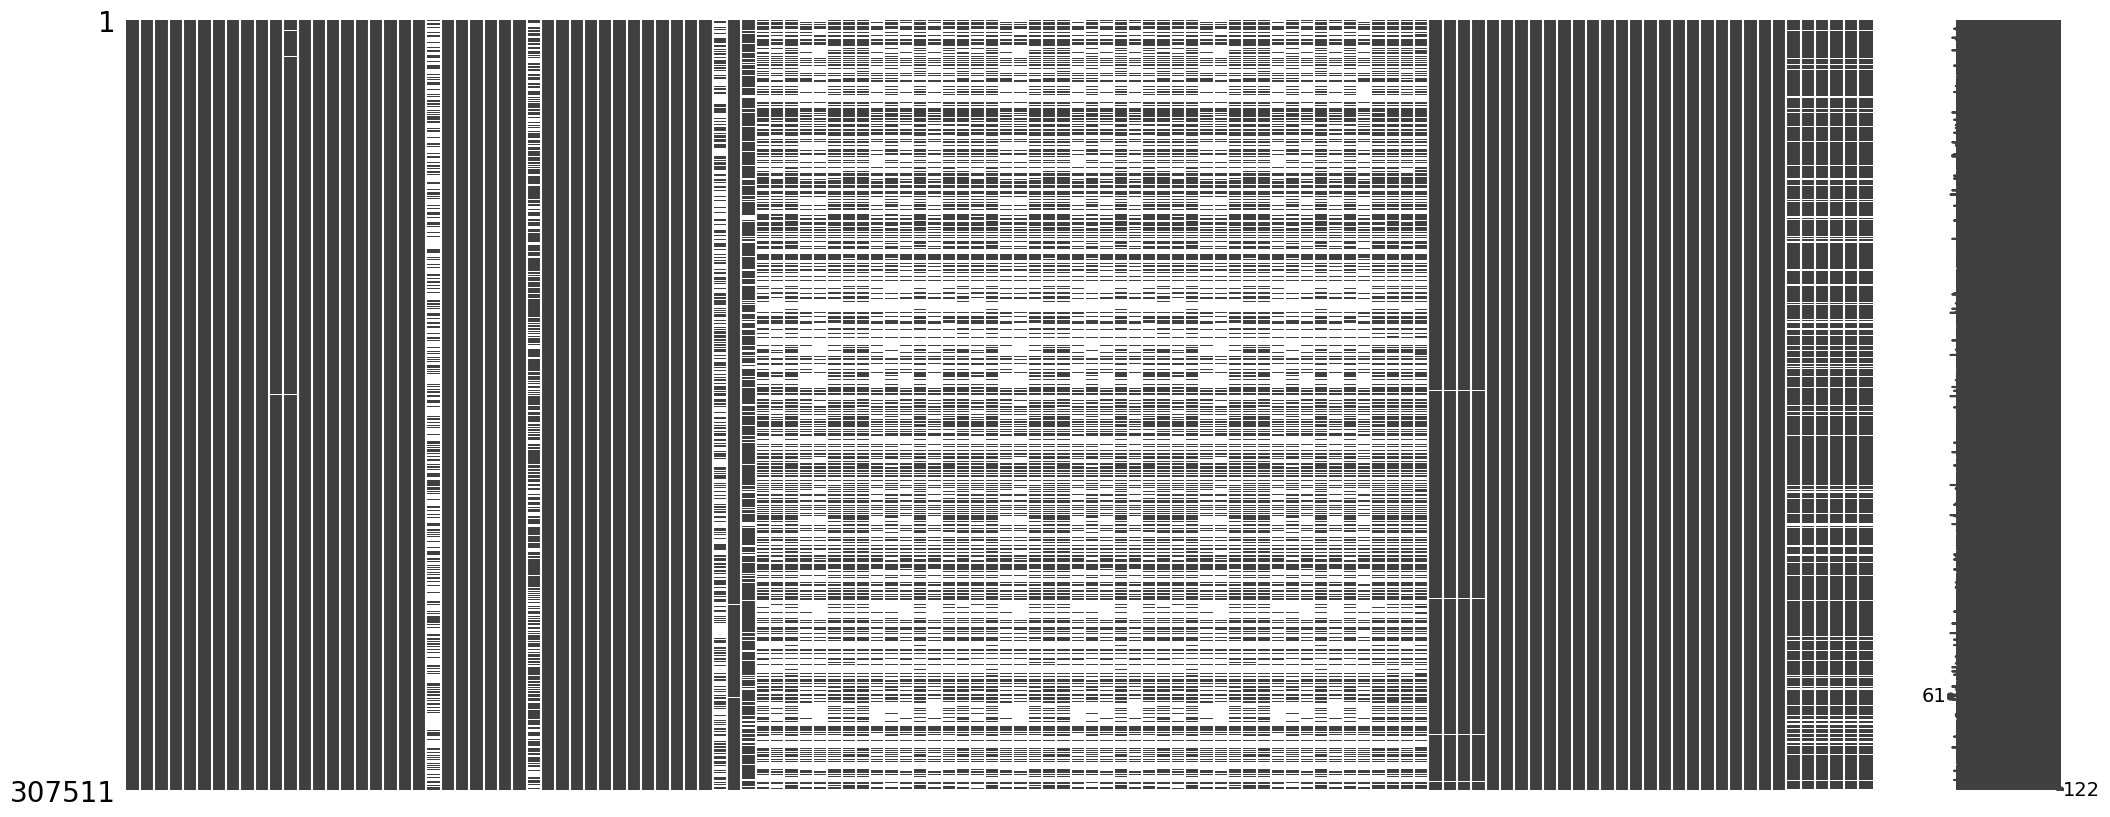

In [ ]:
#applicationDF Missing values

import missingno as mn
mn.matrix(appDF)

**Insight:**

Based on the above Matrix, it is evident that the dataset has many missing values. Let's check for each column what is the % of missing values

In [ ]:
# % null value in each column
round(appDF.isnull().sum()/appDF.shape[0]*100,2)

SK_ID_CURR                       0.00
TARGET                           0.00
NAME_CONTRACT_TYPE               0.00
CODE_GENDER                      0.00
FLAG_OWN_CAR                     0.00
FLAG_OWN_REALTY                  0.00
CNT_CHILDREN                     0.00
AMT_INCOME_TOTAL                 0.00
AMT_CREDIT                       0.00
AMT_ANNUITY                      0.00
AMT_GOODS_PRICE                  0.09
NAME_TYPE_SUITE                  0.42
NAME_INCOME_TYPE                 0.00
NAME_EDUCATION_TYPE              0.00
NAME_FAMILY_STATUS               0.00
NAME_HOUSING_TYPE                0.00
REGION_POPULATION_RELATIVE       0.00
DAYS_BIRTH                       0.00
DAYS_EMPLOYED                    0.00
DAYS_REGISTRATION                0.00
DAYS_ID_PUBLISH                  0.00
OWN_CAR_AGE                     65.99
FLAG_MOBIL                       0.00
FLAG_EMP_PHONE                   0.00
FLAG_WORK_PHONE                  0.00
FLAG_CONT_MOBILE                 0.00
FLAG_PHONE  

**Insight:**

There are many columns in applicationDF dataframe where missing value is more than 40%. Let's plot the columns vs missing value % with 40% being the cut-off marks

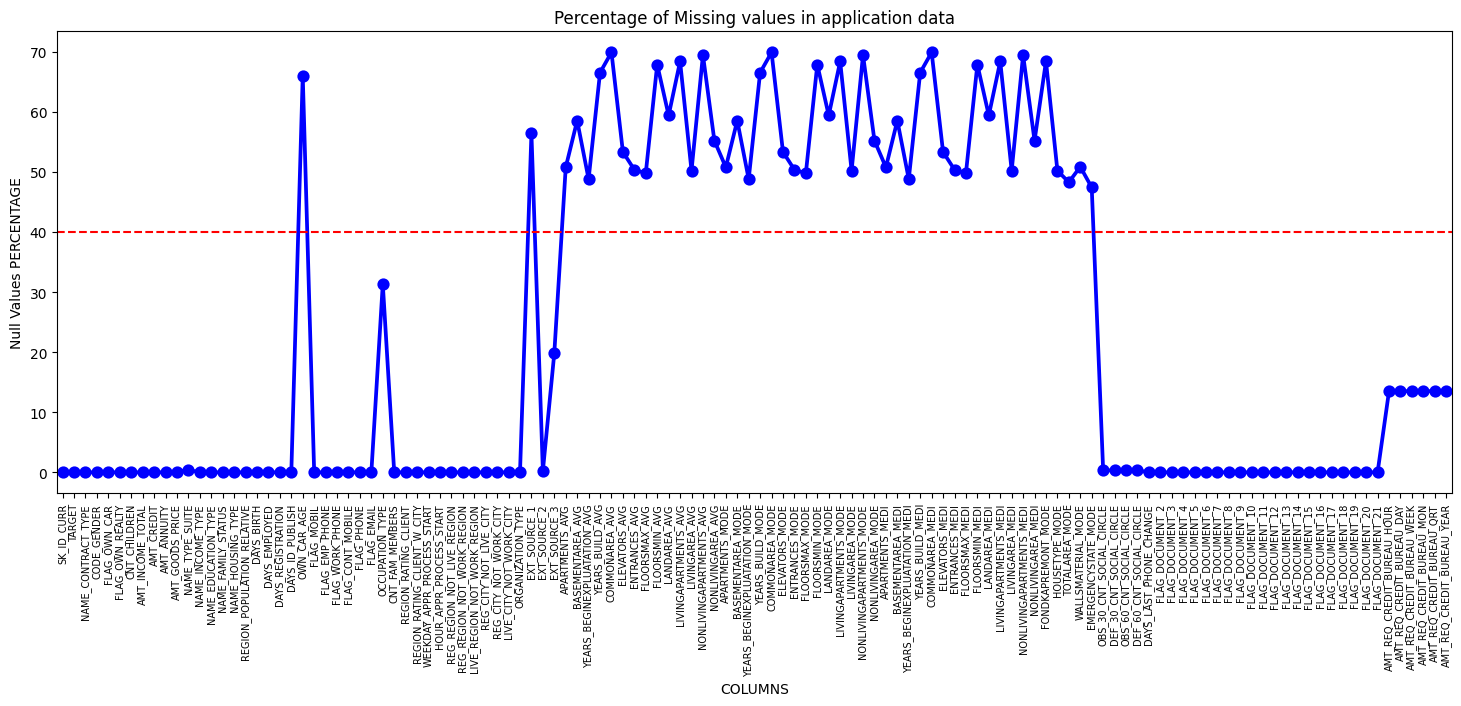

In [ ]:
null_app=pd.DataFrame(appDF.isnull().sum()*100/appDF.shape[0]).reset_index()
null_app.columns=['Column Name', 'Null Value Percentage']
fig=plt.figure(figsize=(18,6))
ax=sns.pointplot(x='Column Name', y='Null Value Percentage', data=null_app,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()


**Insight:**

From the plot we can see the columns in which percentage of null values more than 40% are marked above the red line and the columns which have less than 40 % null values below the red line. Let's check the columns which has more than 40% missing values

In [ ]:
# more than or equal to 40% empty rows columns
null_40_app= null_app[null_app['Null Value Percentage']>=40]
null_40_app.sort_values('Null Value Percentage')

Column Name  Null Value Percentage
90           EMERGENCYSTATE_MODE              47.398304
88                TOTALAREA_MODE              48.268517
74  YEARS_BEGINEXPLUATATION_MEDI              48.781019
46   YEARS_BEGINEXPLUATATION_AVG              48.781019
60  YEARS_BEGINEXPLUATATION_MODE              48.781019
79                FLOORSMAX_MEDI              49.760822
65                FLOORSMAX_MODE              49.760822
51                 FLOORSMAX_AVG              49.760822
87                HOUSETYPE_MODE              50.176091
69               LIVINGAREA_MODE              50.193326
55                LIVINGAREA_AVG              50.193326
83               LIVINGAREA_MEDI              50.193326
78                ENTRANCES_MEDI              50.348768
64                ENTRANCES_MODE              50.348768
50                 ENTRANCES_AVG              50.348768
72               APARTMENTS_MEDI              50.749729
58               APARTMENTS_MODE              50.749729
44                APARTMENTS_AVG              50.749729
89            WALLSMATERIAL_MODE              50.840783
49                 ELEVATORS_AVG              53.295980
63                ELEVATORS_MODE              53.295980
77                ELEVATORS_MEDI              53.295980
71            NONLIVINGAREA_MODE              55.179164
57             NONLIVINGAREA_AVG              55.179164
85            NONLIVINGAREA_MEDI              55.179164
41                  EXT_SOURCE_1              56.381073
45              BASEMENTAREA_AVG              58.515956
59             BASEMENTAREA_MODE              58.515956
73             BASEMENTAREA_MEDI              58.515956
81                 LANDAREA_MEDI              59.376738
67                 LANDAREA_MODE              59.376738
53                  LANDAREA_AVG              59.376738
21                   OWN_CAR_AGE              65.990810
75              YEARS_BUILD_MEDI              66.497784
61              YEARS_BUILD_MODE              66.497784
47               YEARS_BUILD_AVG              66.497784
80                FLOORSMIN_MEDI              67.848630
52                 FLOORSMIN_AVG              67.848630
66                FLOORSMIN_MODE              67.848630
68         LIVINGAPARTMENTS_MODE              68.354953
82         LIVINGAPARTMENTS_MEDI              68.354953
54          LIVINGAPARTMENTS_AVG              68.354953
86            FONDKAPREMONT_MODE              68.386172
56       NONLIVINGAPARTMENTS_AVG              69.432963
84      NONLIVINGAPARTMENTS_MEDI              69.432963
70      NONLIVINGAPARTMENTS_MODE              69.432963
76               COMMONAREA_MEDI              69.872297
62               COMMONAREA_MODE              69.872297
48                COMMONAREA_AVG              69.872297

In [ ]:
# How many columns have more than or euqal to 40% null values ?
len(null_40_app)

49

**Insight:**

Total of 49 columns are there which have more than 40% null values.Seems like most of the columns with high missing values are related to different area sizes on apartment owned/rented by the loan applicant

**previousDF Missing Values**

<Axes: >

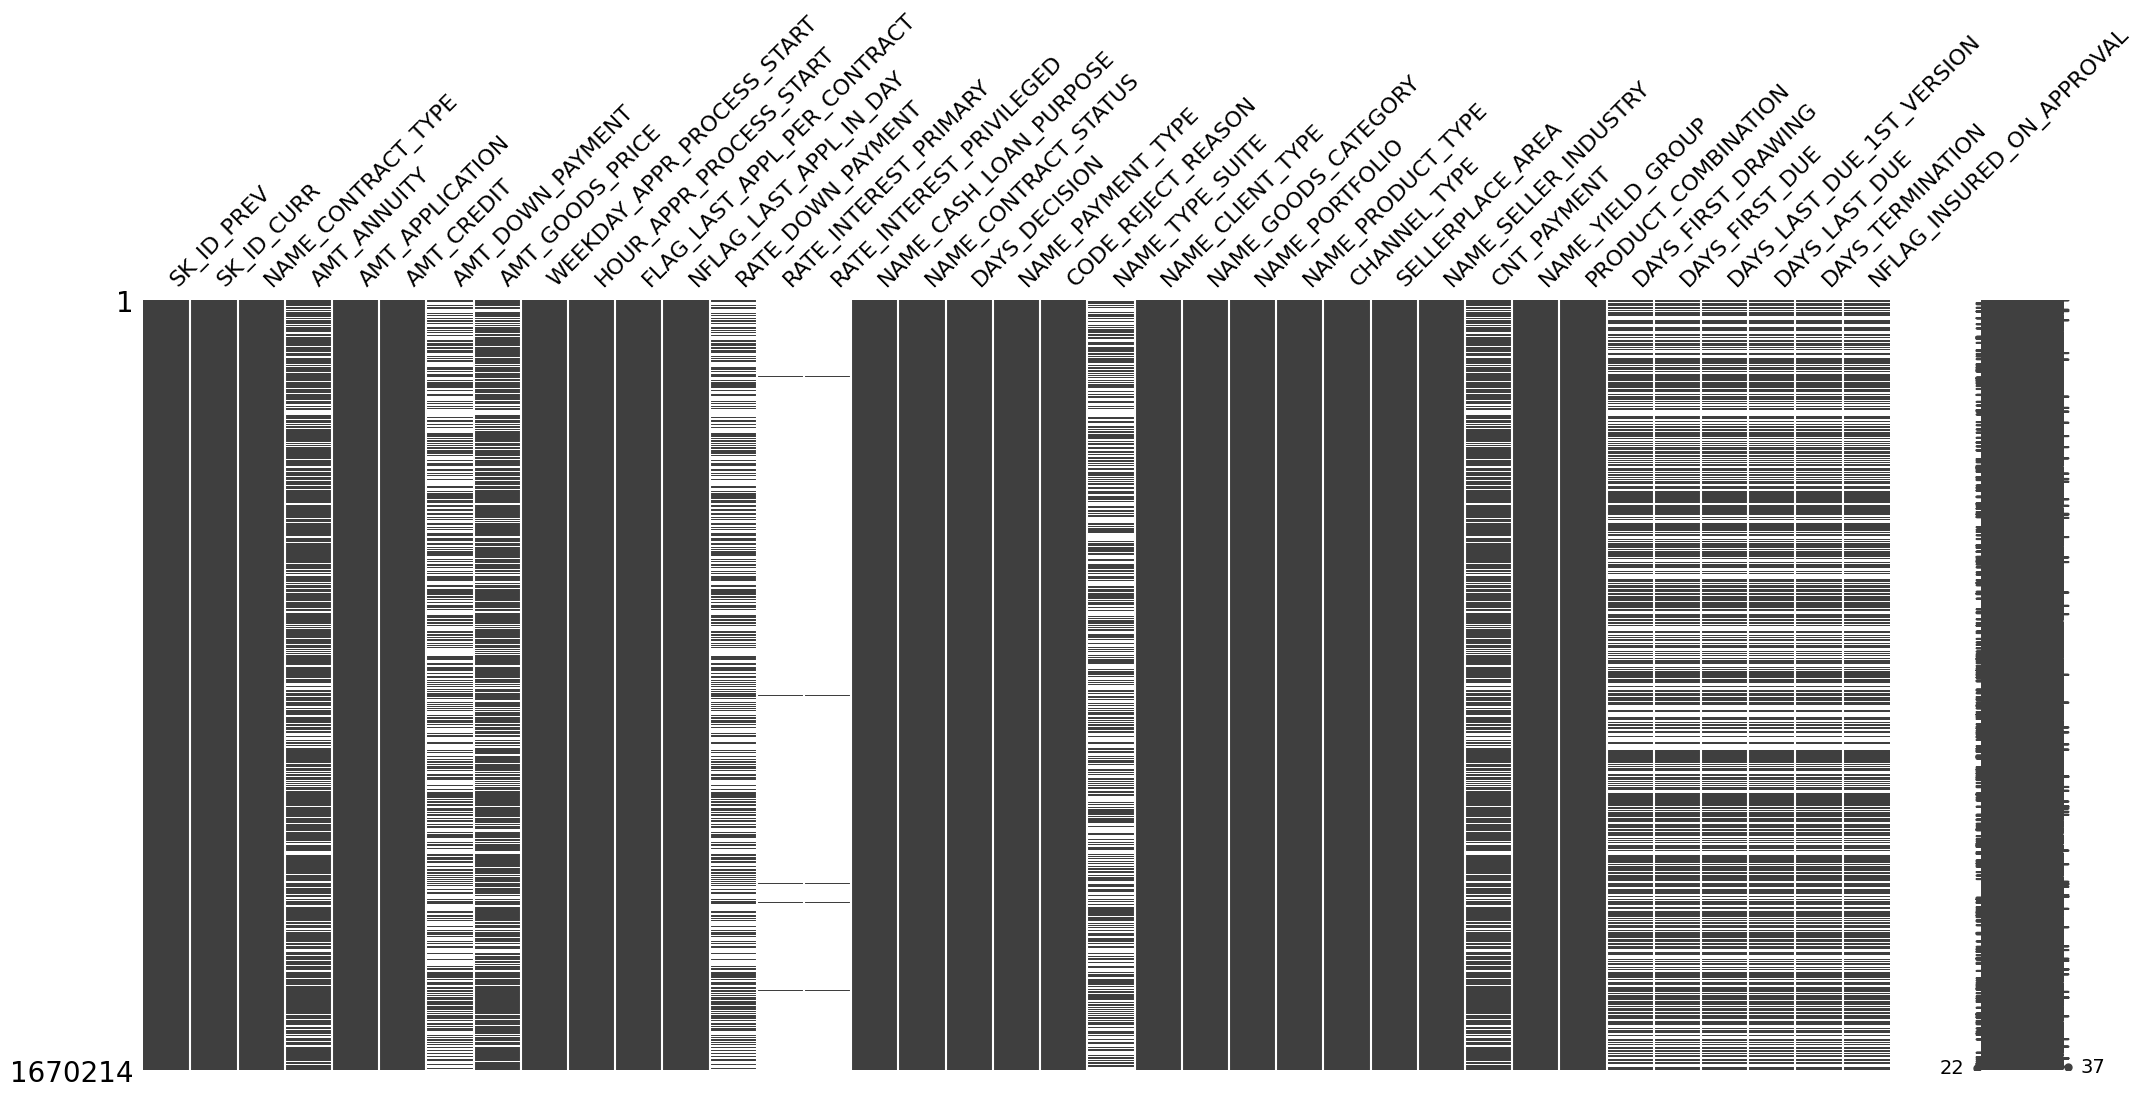

In [ ]:
mn.matrix(prevDF)

In [ ]:
round((prevDF.isnull().sum()/prevDF.shape[0]*100),2)

SK_ID_PREV                      0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_ANNUITY                    22.29
AMT_APPLICATION                 0.00
AMT_CREDIT                      0.00
AMT_DOWN_PAYMENT               53.64
AMT_GOODS_PRICE                23.08
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
RATE_DOWN_PAYMENT              53.64
RATE_INTEREST_PRIMARY          99.64
RATE_INTEREST_PRIVILEGED       99.64
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_TYPE_SUITE                49.12
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
CHANNEL_TYPE                    0.00
SELLERPLACE_AREA                0.00
N

**Insight:**

There are many columns in previousDF dataframe where missing value is more than 40%. Let's plot the columns vs missing value % with 40% being the cut-off marks

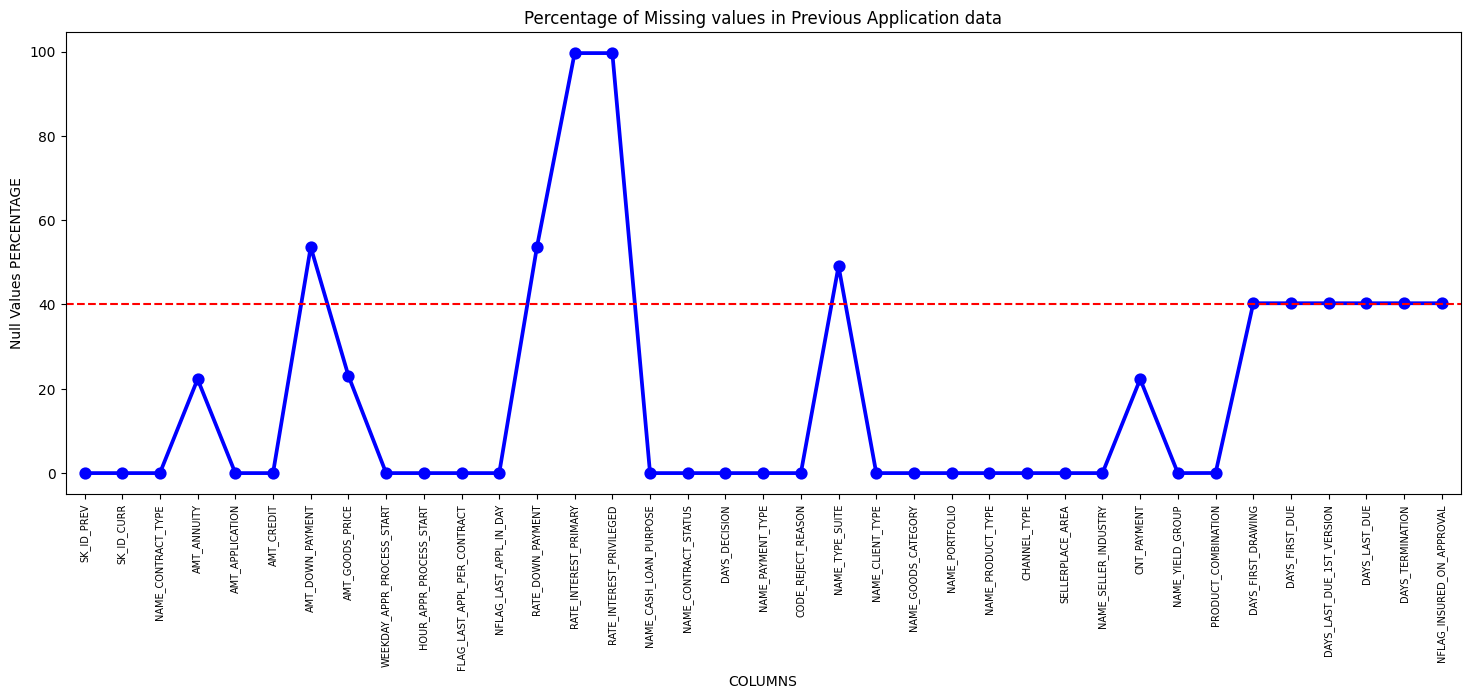

In [ ]:
null_prev=pd.DataFrame(prevDF.isnull().sum()*100/prevDF.shape[0]).reset_index()
null_prev.columns=['Column Name', 'Null Value Percentage']
fig=plt.figure(figsize=(18,6))
ax=sns.pointplot(x='Column Name', y='Null Value Percentage', data=null_prev,color='blue')
plt.xticks(rotation =90,fontsize =7)
ax.axhline(40, ls='--',color='red')
plt.title("Percentage of Missing values in Previous Application data")
plt.ylabel("Null Values PERCENTAGE")
plt.xlabel("COLUMNS")
plt.show()

**Insight:**

From the plot we can see the columns in which percentage of null values more than 40% are marked above the red line and the columns which have less than 40 % null values below the red line. Let's check the columns which has more than 40% missing values

In [ ]:
null_40_prev=null_prev[null_prev['Null Value Percentage']>=40]
null_40_prev

Column Name  Null Value Percentage
6            AMT_DOWN_PAYMENT              53.636480
12          RATE_DOWN_PAYMENT              53.636480
13      RATE_INTEREST_PRIMARY              99.643698
14   RATE_INTEREST_PRIVILEGED              99.643698
20            NAME_TYPE_SUITE              49.119754
31         DAYS_FIRST_DRAWING              40.298129
32             DAYS_FIRST_DUE              40.298129
33  DAYS_LAST_DUE_1ST_VERSION              40.298129
34              DAYS_LAST_DUE              40.298129
35           DAYS_TERMINATION              40.298129
36  NFLAG_INSURED_ON_APPROVAL              40.298129

In [ ]:
len(null_40_prev)

11

**Insight:**

Total of 11 columns are there which have more than 40% null values. These columns can be deleted. Before deleting these columns, let's review if there are more columns which can be dropped or not

**Analyze & Delete Unnecessary Columns in applicationDF**

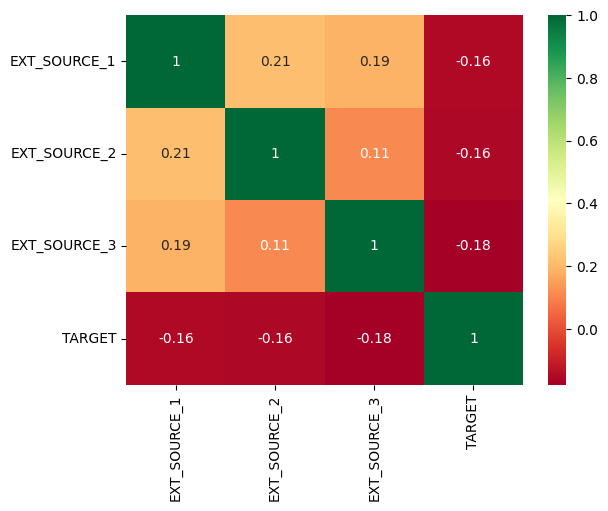

In [ ]:
# Checking correlation of EXT_SOURCE_X columns vs TARGET column
source=appDF[['EXT_SOURCE_1', 'EXT_SOURCE_2','EXT_SOURCE_3','TARGET']]
source_corr=source.corr()
ax=sns.heatmap(
    source_corr, xticklabels=source_corr.columns, yticklabels=source_corr.columns, annot=True, cmap='RdYlGn'

)

**Insight:**

Based on the above Heatmap, we can see there is almost no correlation between EXT_SOURCE_X columns and target column, thus we can drop these columns. EXT_SOURCE_1 has 56% null values, where as EXT_SOURCE_3 has close to 20% null values

In [ ]:
# create a list of columns that needs to be dropped including the columns with >40% null values
unwanted_app=null_40_app['Column Name'].to_list()+['EXT_SOURCE_2','EXT_SOURCE_3'] # as EXT_SOURCE_1 column is already included in nullcol_40_application
len(unwanted_app)

51

In [ ]:
# Checking the relevance of Flag_Document and whether it has any relation with loan repayment status
col_doc = [ 'FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3','FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
           'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9','FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12','FLAG_DOCUMENT_13',
           'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18',
           'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

df_flag=appDF[col_doc+['TARGET']]
length=len(col_doc)
df_flag['TARGET']= df_flag['TARGET'].replace({1:'Defaulter', 0:'Repayer'})

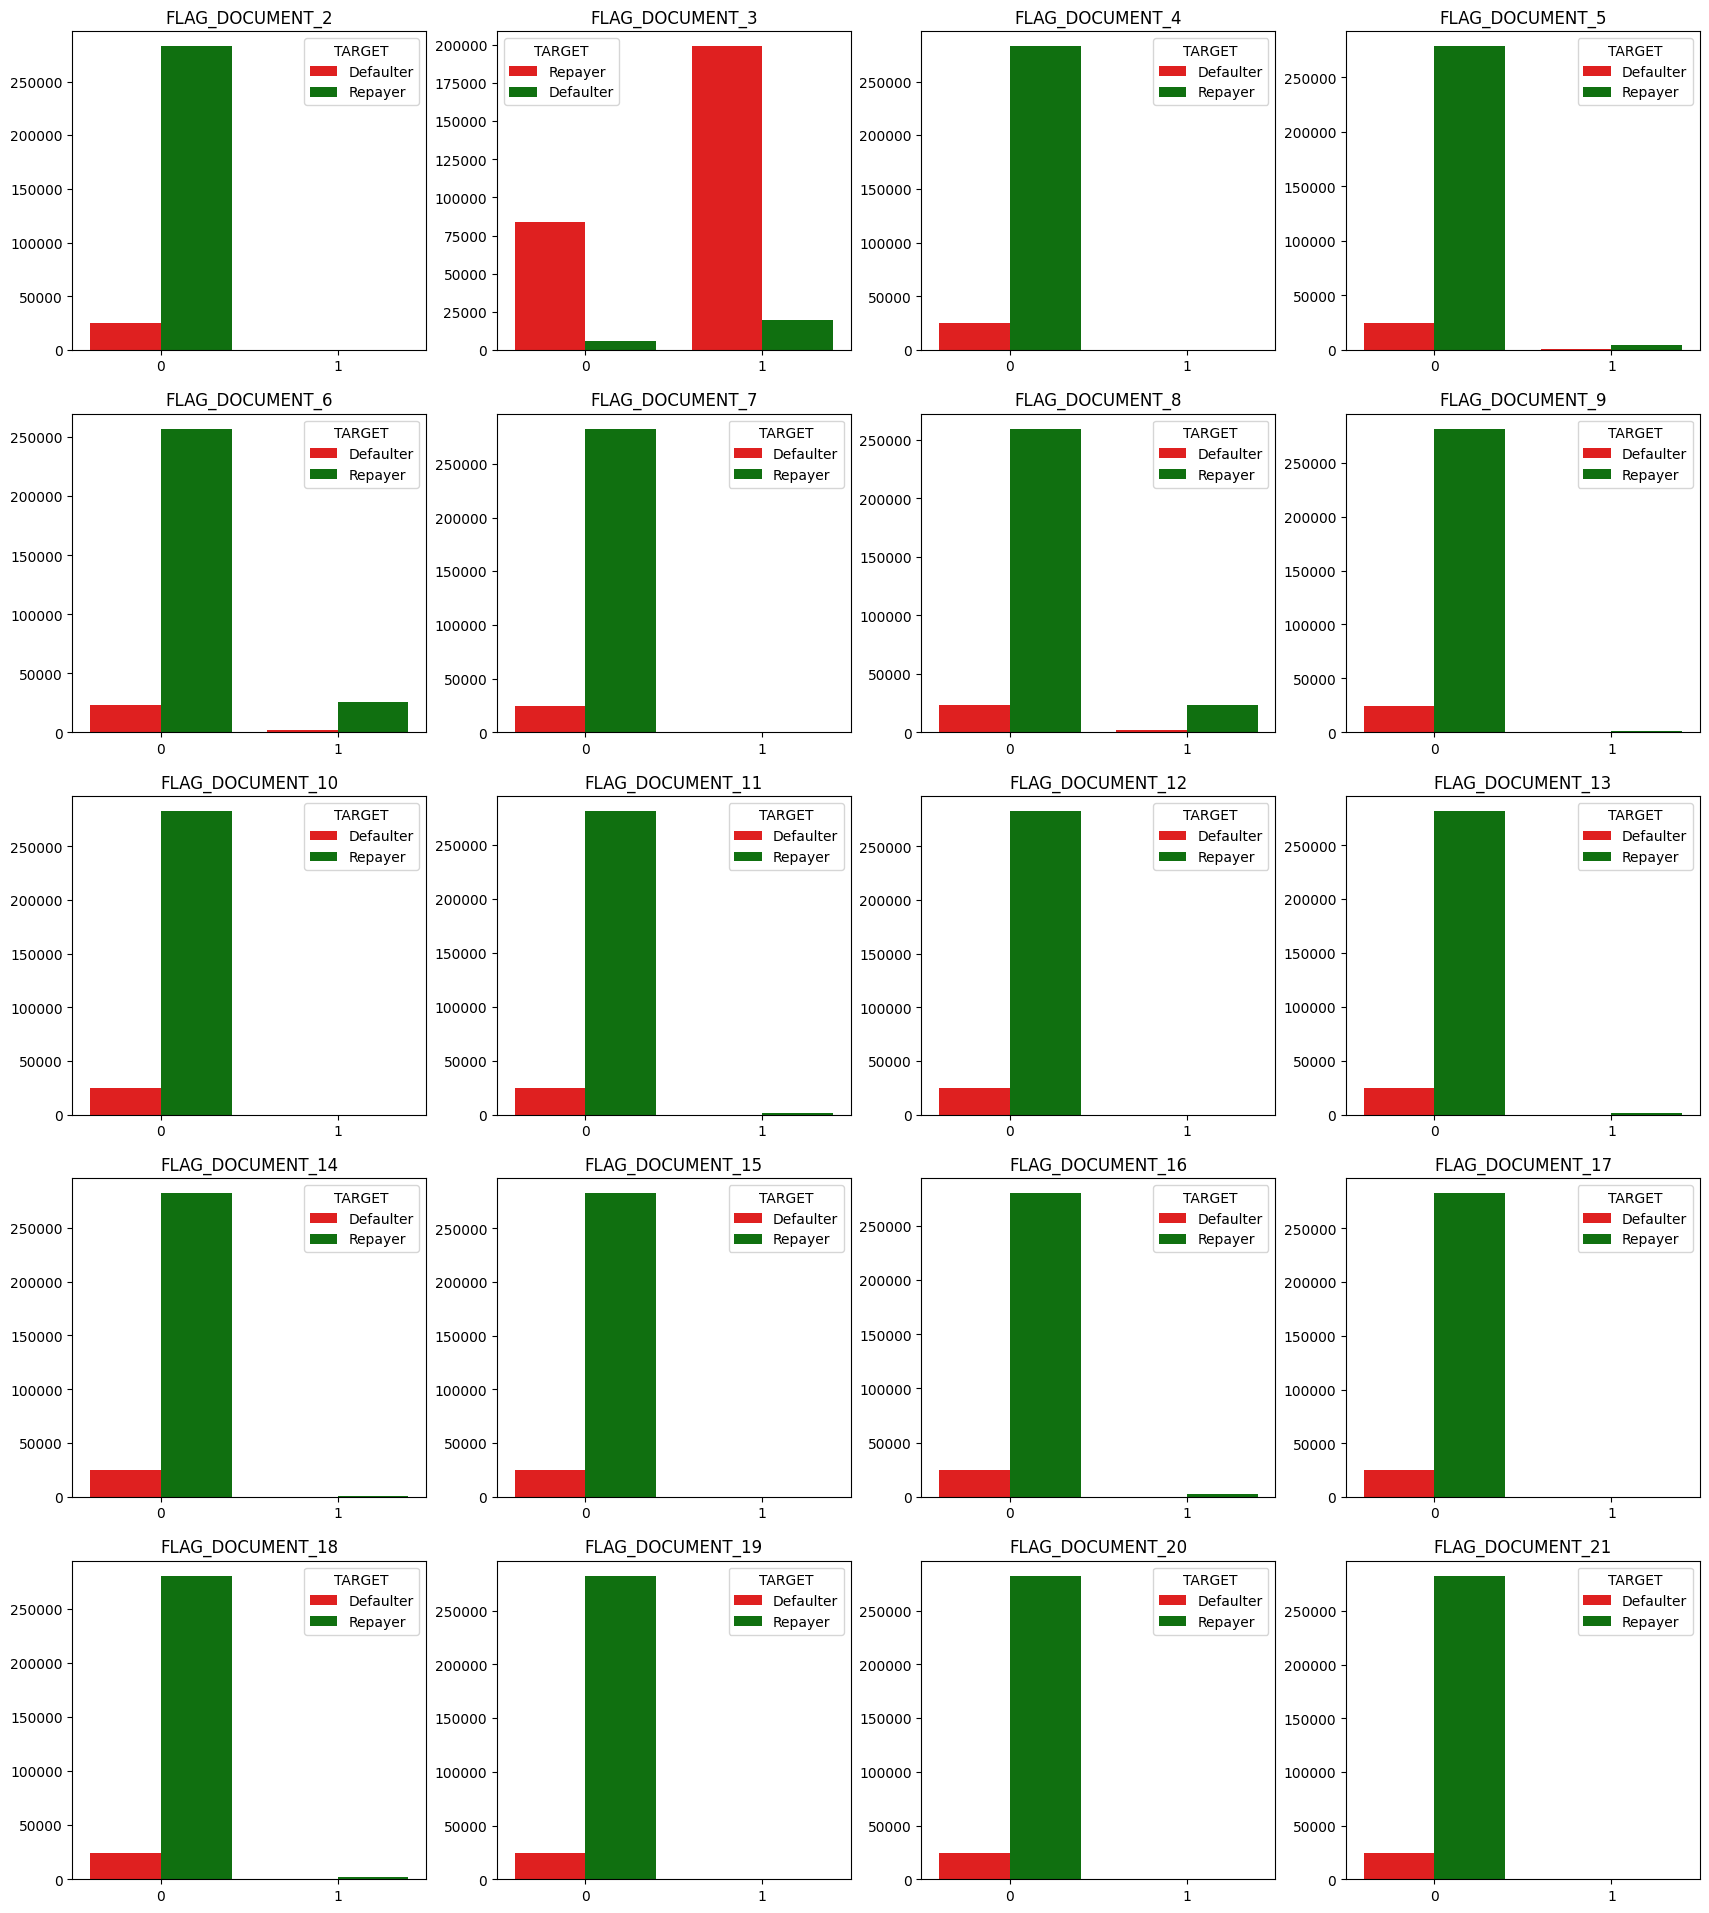

In [ ]:
#df_flag['TARGET']= df_flag['TARGET'].replace({1:'Defaulter', 0:'Repayer'})

fig=plt.figure(figsize=(21,24))
for i,j in itertools.zip_longest(col_doc, range(length)):
  plt.subplot(5,4,j+1)
  ax=sns.countplot(data=df_flag, x=df_flag[i], hue=df_flag['TARGET'], palette=['r','g'])
  plt.xlabel("")
  plt.ylabel("")
  plt.title(i)

**Insight:**

The above graph shows that in most of the loan application cases, clients who applied for loans has not submitted FLAG_DOCUMENT_X except FLAG_DOCUMENT_3. Thus, Except for FLAG_DOCUMENT_3, we can delete rest of the columns. Data shows if borrower has submitted FLAG_DOCUMENT_3 then there is a less chance of defaulting the loan.

In [ ]:
# Including the flag documents for dropping the Document columns
col_doc.remove('FLAG_DOCUMENT_3')
unwanted_app=unwanted_app+ col_doc
len(unwanted_app)

70

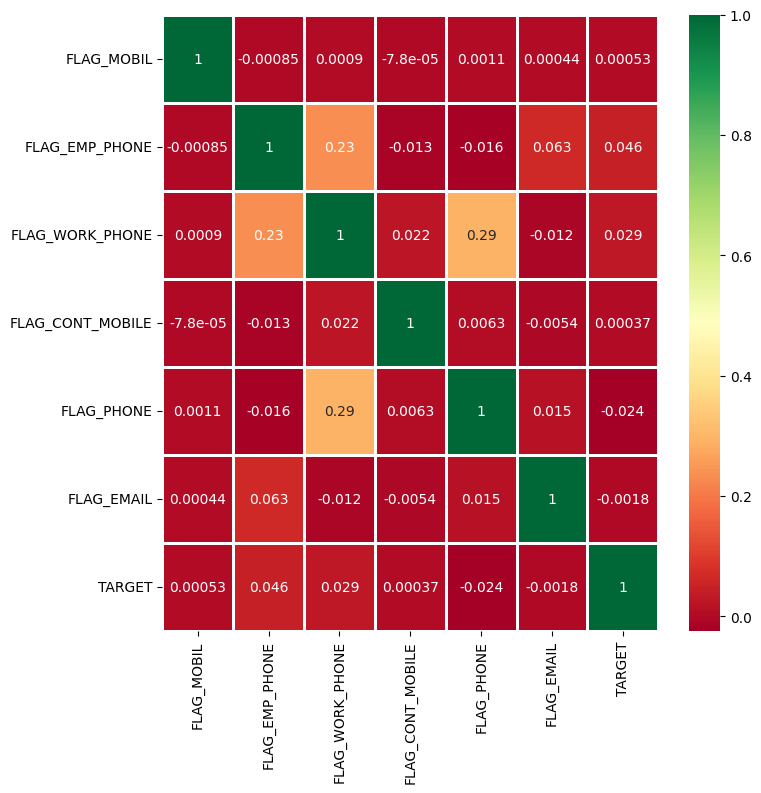

In [ ]:
# checking is there is any correlation between mobile phone, work phone etc, email, Family members and Region rating
contact_col=['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL','TARGET']
contact_corr=appDF[contact_col].corr()

fig = plt.figure(figsize=(8,8))
ax = sns.heatmap(contact_corr,
            xticklabels=contact_corr.columns,
            yticklabels=contact_corr.columns,
            annot = True,
            cmap ="RdYlGn",
            linewidth=1)


**Insight:**

There is no correlation between flags of mobile phone, email etc with loan repayment; thus these columns can be deleted

In [ ]:
# including the 6 FLAG columns to be deleted
contact_col.remove('TARGET')
unwanted_app=unwanted_app+contact_col
len(unwanted_app)

76

**Insight:**

Total 76 columns can be deleted from applicationDF

In [ ]:
appDF.drop(labels=unwanted_app, axis=1, inplace=True)

In [ ]:
appDF.shape

(307511, 46)

**Insight:**

After deleting unnecessary columns, there are 46 columns remaining in applicationDF

**Analyze & Delete Unnecessary Columns in previousDF**

In [ ]:
unwanted_prev=null_40_prev['Column Name'].to_list()
unwanted_prev

['AMT_DOWN_PAYMENT',
 'RATE_DOWN_PAYMENT',
 'RATE_INTEREST_PRIMARY',
 'RATE_INTEREST_PRIVILEGED',
 'NAME_TYPE_SUITE',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [ ]:
# Listing down columns which are not needed
Unnecessary_previous = ['WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START',
                        'FLAG_LAST_APPL_PER_CONTRACT','NFLAG_LAST_APPL_IN_DAY']

In [ ]:
unwanted_prev=unwanted_prev+Unnecessary_previous
len(unwanted_prev)

15

**Insight:**

Total 15 columns can be deleted from previousDF

In [ ]:
# Dropping the unnecessary columns from previous
prevDF.drop(labels=unwanted_prev,axis=1,inplace=True)
# Inspecting the dataframe after removal of unnecessary columns
prevDF.shape

(1670214, 22)

**Insight:**

After deleting unnecessary columns, there are 22 columns remaining in applicationDF

**Standardize Values**

**Strategy for applicationDF:**

1. Convert DAYS_DECISION,DAYS_EMPLOYED, DAYS_REGISTRATION,DAYS_ID_PUBLISH from negative to positive as days cannot be negative.

2. Convert DAYS_BIRTH from negative to positive values and calculate age and create categorical bins columns

3. Categorize the amount variables into bins

4. Convert region rating column and few other columns to categorical

In [ ]:
# Converting Negative days to positive days
date_col=['DAYS_BIRTH','DAYS_EMPLOYED','DAYS_REGISTRATION','DAYS_ID_PUBLISH']
for col in date_col:
  appDF[col]=abs(appDF[col])

In [ ]:
# Binning Numerical Columns to create a categorical column

# Creating bins for income amount
appDF['AMT_INCOME_TOTAL']=appDF['AMT_INCOME_TOTAL']/100000
bins=[0,1,2,3,4,5,6,7,8,9,10,11]
slot=['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k','800k-900k','900k-1M', '1M Above']

appDF['AMT_INCOME_RANGE']=pd.cut(appDF['AMT_INCOME_TOTAL'], bins=bins, labels=slot)

In [ ]:
appDF['AMT_INCOME_RANGE'].value_counts(normalize=True)*100

AMT_INCOME_RANGE
100K-200K    50.735000
200k-300k    21.210691
0-100K       20.729695
300k-400k     4.776116
400k-500k     1.744669
500k-600k     0.356354
600k-700k     0.282805
800k-900k     0.096980
700k-800k     0.052721
900k-1M       0.009112
1M Above      0.005858
Name: proportion, dtype: float64

**Insight:**

More than 50% loan applicants have income amount in the range of 100K-200K. Almost 92% loan applicants have income less than 300K

In [ ]:
# Creating bins for Credit amount
appDF['AMT_CREDIT']=appDF['AMT_CREDIT']/100000
bins=[0,1,2,3,4,5,6,7,8,9,10,100]
slots = ['0-100K','100K-200K', '200k-300k','300k-400k','400k-500k','500k-600k','600k-700k','700k-800k',
       '800k-900k','900k-1M', '1M Above']
appDF['AMT_CREDIT_RANGE']=pd.cut(appDF['AMT_CREDIT'], bins=bins, labels=slots)


In [ ]:
appDF['AMT_CREDIT_RANGE'].value_counts(normalize=True)*100

AMT_CREDIT_RANGE
200k-300k    17.824728
1M Above     16.254703
500k-600k    11.131960
400k-500k    10.418489
100K-200K     9.801275
300k-400k     8.564897
600k-700k     7.820533
800k-900k     7.086576
700k-800k     6.241403
900k-1M       2.902986
0-100K        1.952450
Name: proportion, dtype: float64

**Insight:**

More Than 16% loan applicants have taken loan which amounts to more than 1M

In [ ]:
# Creating bins for Age
appDF['AGE']=appDF['DAYS_BIRTH']//365
bins=[0,20,30,40,50,100]
slots = ['0-20','20-30','30-40','40-50','50 above']

appDF['AGE_GROUP']=pd.cut(appDF['AGE'],bins=bins,labels=slots)

In [ ]:
appDF['AGE_GROUP'].value_counts(normalize=True)*100

AGE_GROUP
50 above    31.604398
30-40       27.028952
40-50       24.194582
20-30       17.171743
0-20         0.000325
Name: proportion, dtype: float64

**Insight:**

31% loan applicants have age above 50 years. More than 55% of loan applicants have age over 40 years.

In [ ]:
# Creating bins for Employement Time
appDF['YEAR_EMPLOYED']=appDF['DAYS_EMPLOYED']//365
bins=[0,5,10,20,30,40,50, 60,150]
slots=['0-5','5-10','10-20','20-30','30-40','40-50','50-60','60 above']
appDF['EMPLOYEE_TENURE']=pd.cut(appDF['YEAR_EMPLOYED'], bins=bins, labels=slots)


In [ ]:
appDF['EMPLOYEE_TENURE'].value_counts(normalize=True)*100

EMPLOYEE_TENURE
0-5         55.582363
5-10        24.966441
10-20       14.564315
20-30        3.750117
30-40        1.058720
40-50        0.078044
50-60        0.000000
60 above     0.000000
Name: proportion, dtype: float64

**Insight:**

More than 55% of the loan applicants have work experience within 0-5 years and almost 80% of them have less than 10 years of work experience

In [ ]:
#Checking the number of unique values each column possess to identify categorical columns
appDF.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY             2
TARGET                              2
NAME_CONTRACT_TYPE                  2
REG_REGION_NOT_LIVE_REGION          2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
FLAG_DOCUMENT_3                     2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
REGION_RATING_CLIENT                3
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
AMT_REQ_CREDIT_BUREAU_HOUR          5
NAME_EDUCATION_TYPE                 5
AGE_GROUP                           5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
EMPLOYEE_TENURE                     6
WEEKDAY_APPR_PROCESS_START          7
NAME_TYPE_SUITE                     7
NAME_INCOME_TYPE                    8
AMT_REQ_CREDIT_BUREAU_WEEK          9
AMT_REQ_CREDIT_BUREAU_DAY           9
DEF_60_CNT_SOCIAL_CIRCLE            9
DEF_30_CNT_S

**Data Type Conversion**

In [ ]:
# inspecting the column types if they are in correct data type using the above result
appDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  object  
 3   CODE_GENDER                  307511 non-null  object  
 4   FLAG_OWN_CAR                 307511 non-null  object  
 5   FLAG_OWN_REALTY              307511 non-null  object  
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  object  
 12  NAME_INCOME_TYPE             307511 non-null

**Insight:**

Numeric columns are already in int64 and float64 format. Hence proceeding with other columns.

In [ ]:
#Conversion of Object and Numerical columns to Categorical Columns
categorical_columns = ['NAME_CONTRACT_TYPE','CODE_GENDER','NAME_TYPE_SUITE','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE',
                       'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START',
                       'ORGANIZATION_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','LIVE_CITY_NOT_WORK_CITY',
                       'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION','REGION_RATING_CLIENT','WEEKDAY_APPR_PROCESS_START',
                       'REGION_RATING_CLIENT_W_CITY'
                      ]

for col in categorical_columns:
  appDF[col]=pd.Categorical(appDF[col])


In [ ]:
appDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 52 columns):
 #   Column                       Non-Null Count   Dtype   
---  ------                       --------------   -----   
 0   SK_ID_CURR                   307511 non-null  int64   
 1   TARGET                       307511 non-null  int64   
 2   NAME_CONTRACT_TYPE           307511 non-null  category
 3   CODE_GENDER                  307511 non-null  category
 4   FLAG_OWN_CAR                 307511 non-null  category
 5   FLAG_OWN_REALTY              307511 non-null  category
 6   CNT_CHILDREN                 307511 non-null  int64   
 7   AMT_INCOME_TOTAL             307511 non-null  float64 
 8   AMT_CREDIT                   307511 non-null  float64 
 9   AMT_ANNUITY                  307499 non-null  float64 
 10  AMT_GOODS_PRICE              307233 non-null  float64 
 11  NAME_TYPE_SUITE              306219 non-null  category
 12  NAME_INCOME_TYPE             307511 non-null

**Standardize Values for previousDF**

**Strategy for previousDF:**

*   Convert DAYS_DECISION from negative to positive values and create categorical bins columns.
*   Convert loan purpose and few other columns to categorical.


In [ ]:
#Checking the number of unique values each column possess to identify categorical columns
prevDF.nunique().sort_values()

NAME_PRODUCT_TYPE               3
NAME_PAYMENT_TYPE               4
NAME_CONTRACT_TYPE              4
NAME_CLIENT_TYPE                4
NAME_CONTRACT_STATUS            4
NAME_PORTFOLIO                  5
NAME_YIELD_GROUP                5
CHANNEL_TYPE                    8
CODE_REJECT_REASON              9
NAME_SELLER_INDUSTRY           11
PRODUCT_COMBINATION            17
NAME_CASH_LOAN_PURPOSE         25
NAME_GOODS_CATEGORY            28
CNT_PAYMENT                    49
SELLERPLACE_AREA             2097
DAYS_DECISION                2922
AMT_CREDIT                  86803
AMT_GOODS_PRICE             93885
AMT_APPLICATION             93885
SK_ID_CURR                 338857
AMT_ANNUITY                357959
SK_ID_PREV                1670214
dtype: int64

In [ ]:
# inspecting the column types if the above conversion is reflected
prevDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 22 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   SK_ID_PREV              1670214 non-null  int64  
 1   SK_ID_CURR              1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE      1670214 non-null  object 
 3   AMT_ANNUITY             1297979 non-null  float64
 4   AMT_APPLICATION         1670214 non-null  float64
 5   AMT_CREDIT              1670213 non-null  float64
 6   AMT_GOODS_PRICE         1284699 non-null  float64
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  object 
 8   NAME_CONTRACT_STATUS    1670214 non-null  object 
 9   DAYS_DECISION           1670214 non-null  int64  
 10  NAME_PAYMENT_TYPE       1670214 non-null  object 
 11  CODE_REJECT_REASON      1670214 non-null  object 
 12  NAME_CLIENT_TYPE        1670214 non-null  object 
 13  NAME_GOODS_CATEGORY     1670214 non-null  object 
 14  NA

In [ ]:
#Converting negative days to positive days
prevDF['DAYS_DECISION']=abs(prevDF['DAYS_DECISION'])

In [ ]:
prevDF.head(3)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION
0     2030495      271877     Consumer loans     1730.430          17145.0     17145.0          17145.0                    XAP             Approved             73  Cash through the bank                XAP         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity         12.0           middle  POS mobile with interest
1     2802425      108129         Cash loans    25188.615         607500.0    679671.0         607500.0                    XNA             Approved            164                    XNA                XAP         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA         36.0       low_action          Cash X-Sell: low
2     2523466      122040         Cash loans    15060.735         112500.0    136444.5         112500.0                    XNA             Approved            301  Cash through the bank                XAP         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA         12.0             high         Cash X-Sell: high

In [ ]:
#age group calculation e.g. 388 will be grouped as 300-400
bins=[0,1*365,2*365,3*365,4*365,5*365,6*365,7*365,10*365]
slots=['1','2','3','4','5','6','7','7 Above']
prevDF['YEARLY_DECISION']=pd.cut(prevDF['DAYS_DECISION'], bins=bins, labels=slots)


In [ ]:
prevDF['YEARLY_DECISION'].value_counts(normalize=True)*100

YEARLY_DECISION
1          34.351287
2          23.056806
3          12.855598
4           7.883181
5           6.128556
7           5.813806
7 Above     5.060729
6           4.850037
Name: proportion, dtype: float64

**Insight:**
* **Almost 35% loan applicatants have applied for a new loan within 1 year of previous loan decision**

In [ ]:
#Converting Categorical columns from Object to categorical
Catgorical_col_p = ['NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE',
                    'CODE_REJECT_REASON','NAME_CLIENT_TYPE','NAME_GOODS_CATEGORY','NAME_PORTFOLIO',
                   'NAME_PRODUCT_TYPE','CHANNEL_TYPE','NAME_SELLER_INDUSTRY','NAME_YIELD_GROUP','PRODUCT_COMBINATION',
                    'NAME_CONTRACT_TYPE','YEARLY_DECISION']

for col in Catgorical_col_p:
  prevDF[col]=pd.Categorical(prevDF[col])

In [ ]:
prevDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 23 columns):
 #   Column                  Non-Null Count    Dtype   
---  ------                  --------------    -----   
 0   SK_ID_PREV              1670214 non-null  int64   
 1   SK_ID_CURR              1670214 non-null  int64   
 2   NAME_CONTRACT_TYPE      1670214 non-null  category
 3   AMT_ANNUITY             1297979 non-null  float64 
 4   AMT_APPLICATION         1670214 non-null  float64 
 5   AMT_CREDIT              1670213 non-null  float64 
 6   AMT_GOODS_PRICE         1284699 non-null  float64 
 7   NAME_CASH_LOAN_PURPOSE  1670214 non-null  category
 8   NAME_CONTRACT_STATUS    1670214 non-null  category
 9   DAYS_DECISION           1670214 non-null  int64   
 10  NAME_PAYMENT_TYPE       1670214 non-null  category
 11  CODE_REJECT_REASON      1670214 non-null  category
 12  NAME_CLIENT_TYPE        1670214 non-null  category
 13  NAME_GOODS_CATEGORY     1670214 non-null  

**Null Value Data Imputation**

**Imputing Null Values in applicationDF**

**Strategy for applicationDF:**

*   To impute null values in categorical variables which has lower null mode() is used to impute the most frequent items.percentage,
*   To impute null values in categorical variables which has higher null percentage, a new category is created.

*   To impute null values in numerical variables which has lower null percentage, median() is used as:

    1. There are no outliers in the columns

    2. Mean returned decimal values and median returned whole numbers and the columns were number of requests

In [ ]:
# checking the null value % of each column in applicationDF dataframe
round(appDF.isnull().sum()/appDF.shape[0]*100,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                31.35
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

Impute categorical variable 'NAME_TYPE_SUITE' which has lower null percentage(0.42%) with the most frequent category using mode()

In [ ]:
appDF['NAME_TYPE_SUITE'].value_counts()

NAME_TYPE_SUITE
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64

In [ ]:
appDF['NAME_TYPE_SUITE'].fillna(appDF['NAME_TYPE_SUITE'].mode(), inplace=True)

Impute categorical variable 'OCCUPATION_TYPE' which has higher null percentage(31.35%) with a new category as assigning to any existing category might influence the analysis:

In [ ]:
appDF['OCCUPATION_TYPE']=appDF['OCCUPATION_TYPE'].cat.add_categories('Unknown')
appDF['OCCUPATION_TYPE'].fillna('Unknown', inplace=True)

In [ ]:
appDF["OCCUPATION_TYPE"].isnull().sum()

0

Impute numerical variables with the median as there are no outliers that can be seen from results of describe() and mean() returns decimal values and these columns represent number of enquiries made which cannot be decimal:

In [ ]:
appDF[['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
               'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
               'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']].describe()

AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR
count               265992.000000              265992.000000               265992.000000              265992.000000              265992.000000               265992.000000
mean                     0.006402                   0.007000                    0.034362                   0.267395                   0.265474                    1.899974
std                      0.083849                   0.110757                    0.204685                   0.916002                   0.794056                    1.869295
min                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
25%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000
50%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    1.000000
75%                      0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    3.000000
max                      4.000000                   9.000000                    8.000000                  27.000000                 261.000000                   25.000000

**These above columns represent number of enquries made for the customer(which should be discrete and not continous).
from above describe results we see that all values are numerical and can conclude that for imputing missing we should not use mean as it is in decimal form, hence for imputing purpose we will use median for all these columns.**

In [ ]:
#creating "amt_credit" variable having these columns "AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK",
#"AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR"

amount = ['AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY','AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_MON',
         'AMT_REQ_CREDIT_BUREAU_QRT','AMT_REQ_CREDIT_BUREAU_YEAR']

for col in amount:
  appDF[col].fillna(appDF[col].median(), inplace=True)

In [ ]:
round(appDF.isnull().sum()/appDF.shape[0]*100,2)

SK_ID_CURR                      0.00
TARGET                          0.00
NAME_CONTRACT_TYPE              0.00
CODE_GENDER                     0.00
FLAG_OWN_CAR                    0.00
FLAG_OWN_REALTY                 0.00
CNT_CHILDREN                    0.00
AMT_INCOME_TOTAL                0.00
AMT_CREDIT                      0.00
AMT_ANNUITY                     0.00
AMT_GOODS_PRICE                 0.09
NAME_TYPE_SUITE                 0.42
NAME_INCOME_TYPE                0.00
NAME_EDUCATION_TYPE             0.00
NAME_FAMILY_STATUS              0.00
NAME_HOUSING_TYPE               0.00
REGION_POPULATION_RELATIVE      0.00
DAYS_BIRTH                      0.00
DAYS_EMPLOYED                   0.00
DAYS_REGISTRATION               0.00
DAYS_ID_PUBLISH                 0.00
OCCUPATION_TYPE                 0.00
CNT_FAM_MEMBERS                 0.00
REGION_RATING_CLIENT            0.00
REGION_RATING_CLIENT_W_CITY     0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
R

**Insight:**

We still have few null values in the columns: AMT_GOODS_PRICE, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE. We can ignore as this percentage is very less.

**Imputing Null Values in previousDF**

**Strategy for applicationDF:**

* To impute null values in numerical column, we analysed the loan status and assigned values.

* To impute null values in continuous variables, we plotted the distribution of the columns and used:

    * median if the distribution is skewed

    * mode if the distribution pattern is preserved.

In [ ]:
# checking the null value % of each column in previousDF dataframe
round(prevDF.isnull().sum()/prevDF.shape[0]*100,2).sort_values()

SK_ID_PREV                 0.00
NAME_YIELD_GROUP           0.00
NAME_SELLER_INDUSTRY       0.00
SELLERPLACE_AREA           0.00
CHANNEL_TYPE               0.00
NAME_PRODUCT_TYPE          0.00
NAME_PORTFOLIO             0.00
NAME_GOODS_CATEGORY        0.00
NAME_CLIENT_TYPE           0.00
NAME_PAYMENT_TYPE          0.00
CODE_REJECT_REASON         0.00
NAME_CONTRACT_STATUS       0.00
NAME_CASH_LOAN_PURPOSE     0.00
AMT_CREDIT                 0.00
AMT_APPLICATION            0.00
NAME_CONTRACT_TYPE         0.00
SK_ID_CURR                 0.00
DAYS_DECISION              0.00
YEARLY_DECISION            0.00
PRODUCT_COMBINATION        0.02
AMT_ANNUITY               22.29
CNT_PAYMENT               22.29
AMT_GOODS_PRICE           23.08
dtype: float64

Now dealing with continuos variables "AMT_ANNUITY", "AMT_GOODS_PRICE"

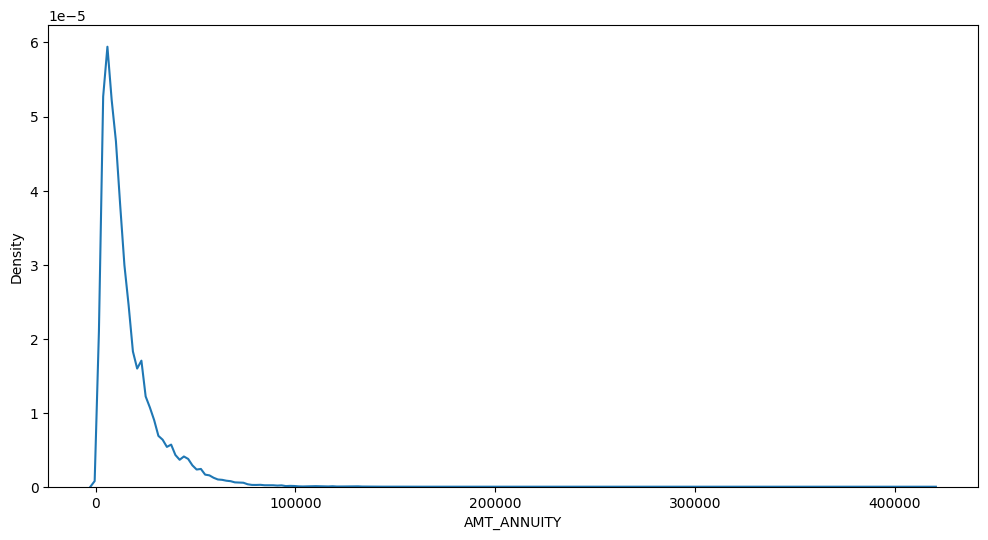

In [ ]:
#plotting a kdeplot to understand distribution of "AMT_ANNUITY"

plt.figure(figsize=(12,6))
sns.kdeplot(prevDF['AMT_ANNUITY'])
plt.show()

**Insight:**


There is a single peak at the left side of the distribution and it indicates the presence of outliers and hence imputing with mean would not be the right approach and hence imputing with median

In [ ]:
prevDF['AMT_ANNUITY'].fillna(prevDF['AMT_ANNUITY'].median(), inplace=True)

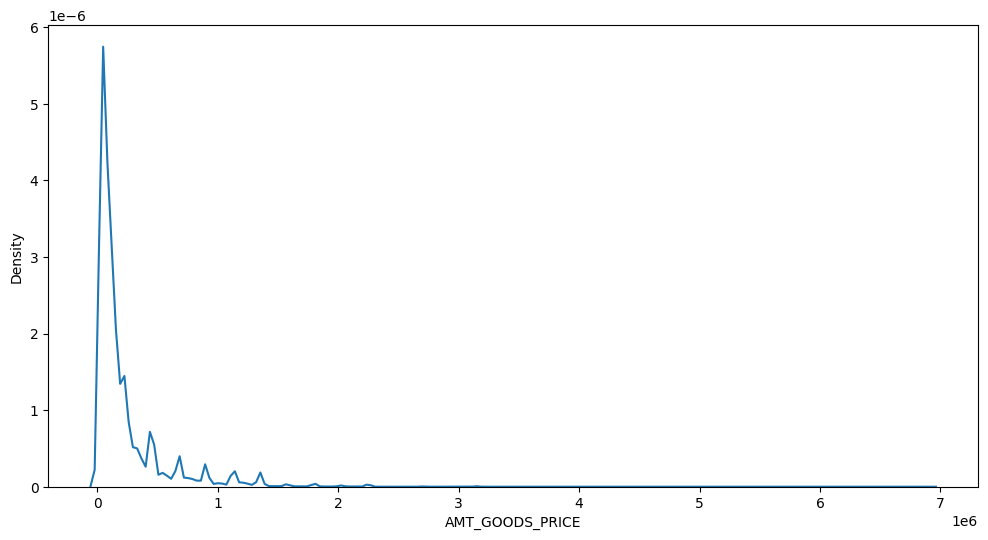

In [ ]:
# Plotting kde plot for "AMT_GOODS_PRICE" to understand the distribution

plt.figure(figsize=(12,6))
sns.kdeplot(prevDF['AMT_GOODS_PRICE'])
plt.show()

* **There are several peaks along the distribution. Let's impute using the mode, mean and median and see if the distribution is still about the same.**

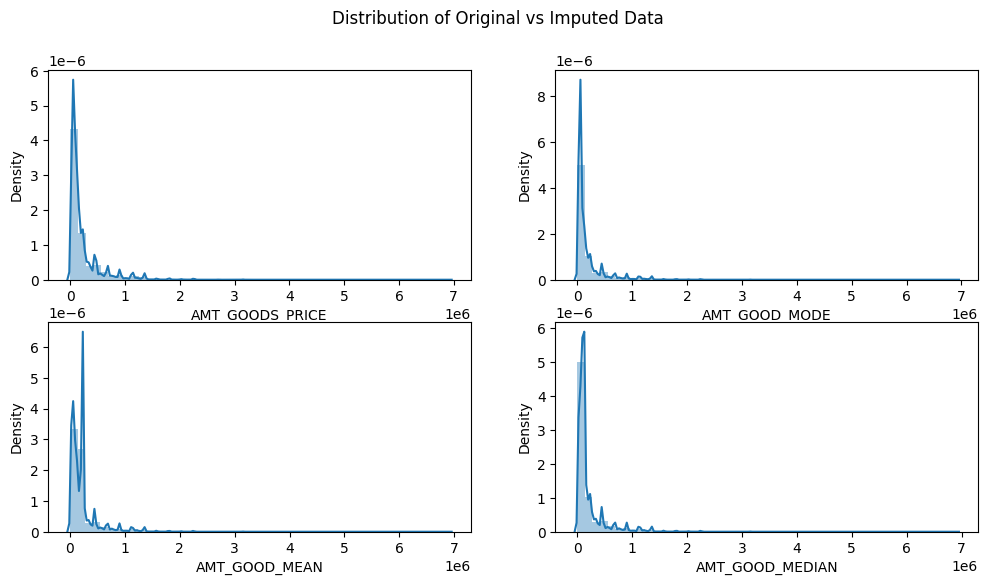

In [ ]:
statsDF=pd.DataFrame()
statsDF['AMT_GOOD_MODE']=prevDF['AMT_GOODS_PRICE'].fillna(prevDF['AMT_GOODS_PRICE'].mode()[0])
statsDF['AMT_GOOD_MEAN']=prevDF['AMT_GOODS_PRICE'].fillna(prevDF['AMT_GOODS_PRICE'].mean())
statsDF['AMT_GOOD_MEDIAN']=prevDF['AMT_GOODS_PRICE'].fillna(prevDF['AMT_GOODS_PRICE'].median())

col=['AMT_GOOD_MODE','AMT_GOOD_MEAN','AMT_GOOD_MEDIAN']

plt.figure(figsize=(12,6))
plt.suptitle('Distribution of Original vs Imputed Data')
plt.subplot(221)
sns.distplot(prevDF['AMT_GOODS_PRICE'][pd.notnull(prevDF['AMT_GOODS_PRICE'])])

for i in enumerate(col):
  plt.subplot(2,2,i[0]+2)
  sns.distplot(statsDF[i[1]])


* **The original distribution is closer with the distribution of data imputed with mode in this case, thus will impute mode for missing values**

In [ ]:
# Imputing null values with mode
prevDF['AMT_GOODS_PRICE'].fillna(prevDF['AMT_GOODS_PRICE'].mode()[0], inplace=True)


Imputing CNT_PAYMENT with 0 as the NAME_CONTRACT_STATUS for these indicate that most of these loans were not started:

In [ ]:
#taking out values count for NAME_CONTRACT_STATUS categories where CNT_PAYMENT have null values.
prevDF.loc[prevDF['CNT_PAYMENT'].isnull(), 'NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Canceled        305805
Refused          40897
Unused offer     25524
Approved             4
Name: count, dtype: int64

In [ ]:
prevDF['CNT_PAYMENT'].fillna(0, inplace=True)

**Identifying the outliers**

Finding outlier information in applicationDF

In [ ]:
appDF.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL     AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  CNT_FAM_MEMBERS  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR            AGE  YEAR_EMPLOYED
count  307511.000000  307511.000000  307511.000000     307511.000000  307511.000000  307499.000000     3.072330e+05               307511.000000  307511.000000  307511.000000      307511.000000    307511.000000    307509.000000            307511.000000               307511.000000             306490.000000             306490.000000             306490.000000             306490.000000           307510.000000    307511.000000               307511.000000              307511.000000               307511.000000              307511.000000              307511.000000               307511.000000  307511.000000  307511.000000
mean   278180.518577       0.080729       0.417052          1.687979       5.990260   27108.573909     5.383962e+05                    0.020868   16036.995067   67724.742149        4986.120328      2994.202373         2.152665                12.063419                    0.015144                  1.422245                  0.143421                  1.405292                  0.100049             -962.858788         0.710023                    0.005538                   0.006055                    0.029723                   0.231293                   0.229631                    1.778463      43.435968     185.021521
std    102790.175348       0.272419       0.722121          2.371231       4.024908   14493.737315     3.694465e+05                    0.013831    4363.988632  139443.751806        3522.886321      1509.450419         0.910682                 3.265832                    0.122126                  2.400989                  0.446698                  2.379803                  0.362291              826.808487         0.453752                    0.078014                   0.103037                    0.190728                   0.856810                   0.744059                    1.765523      11.954593     381.972190
min    100002.000000       0.000000       0.000000          0.256500       0.450000    1615.500000     4.050000e+04                    0.000290    7489.000000       0.000000           0.000000         0.000000         1.000000                 0.000000                    0.000000                  0.000000                  0.000000                  0.000000                  0.000000            -4292.000000         0.000000                    0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    0.000000      20.000000       0.000000
25%    189145.500000       0.000000       0.000000          1.125000       2.700000   16524.000000     2.385000e+05                    0.010006   12413.000000     933.000000        2010.000000      1720.000000         2.000000                10.000000                    0.000000                  0.000000                  0.000000                  0.000000                  0.000000            -1570.000000         0.000000                    0.000000                   0.000000                    0.000000                   0.000000                   0.000000                    1.000000      34.000000       2.000000
50%    278202.000000       0.000000       0.000000          1.471500       5.135310   24903.000000     4.500000e+05                    0.018850   15750.000000    2219.000000        4504.000000      3254.000000         2.000000                12.000000                    0.000000           

from describe we could find all the columns those wo have high difference between max and 75 percentile and the ones which makes no sense having max value to be so high are captured below:

In [ ]:
outlier_col = ["CNT_CHILDREN","AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE",
               "DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION"]

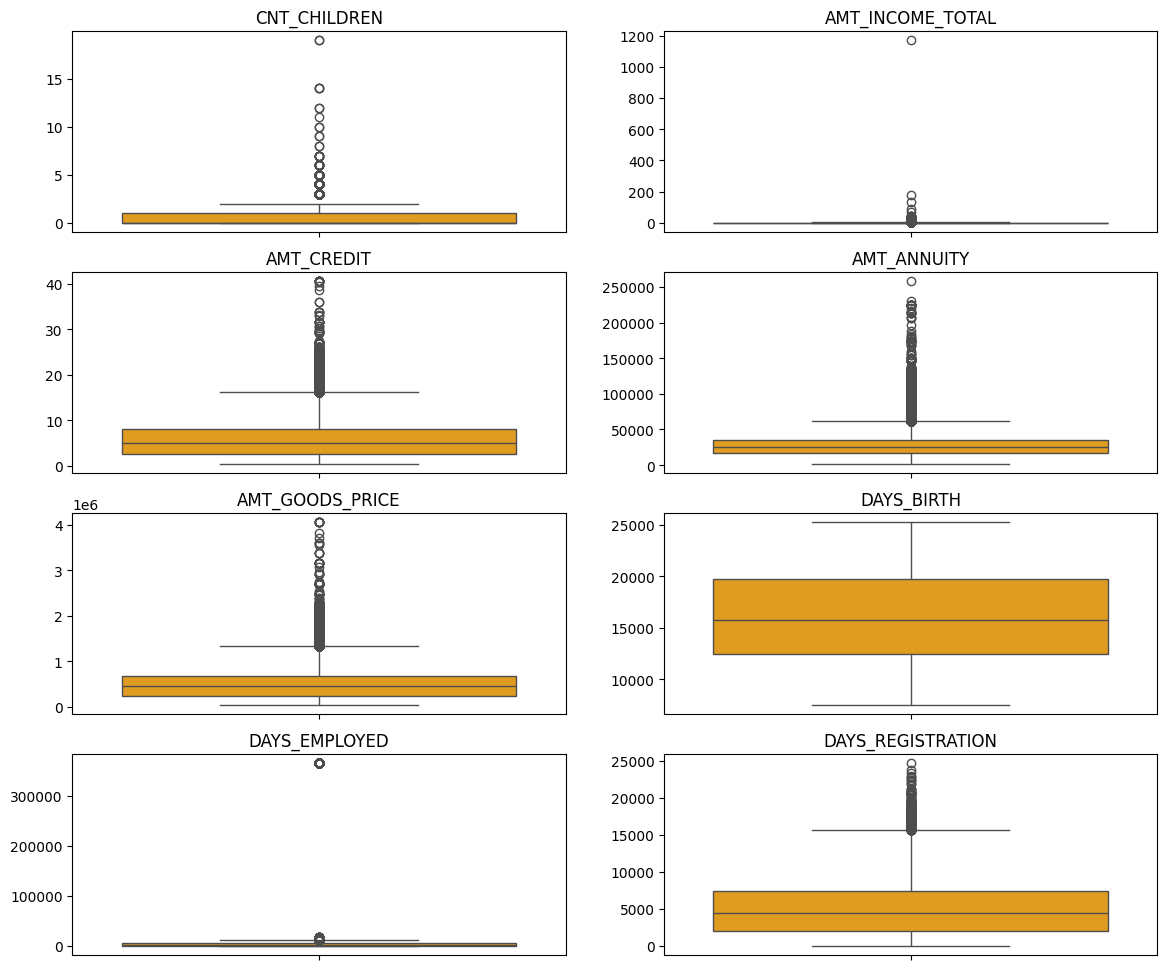

In [ ]:
plt.figure(figsize=(14,12))
for i,j in itertools.zip_longest(outlier_col, range(len(outlier_col))):
  plt.subplot(4,2,j+1)
  sns.boxplot(y=appDF[i], orient='h', color='orange')
  plt.xlabel("")
  plt.ylabel("")
  plt.title(i)


**Insight:**

**It can be seen that in current application data**
   * **AMT_ANNUITY, AMT_CREDIT, AMT_GOODS_PRICE,CNT_CHILDREN have some number of outliers.**
   * **AMT_INCOME_TOTAL has huge number of outliers which indicate that few of the loan applicants have high income when compared to the others.**
   * **DAYS_BIRTH has no outliers which means the data available is reliable.**
   * **DAYS_EMPLOYED has outlier values around 350000(days) which is around 958 years which is impossible and hence this has to be incorrect entry.**

Finding outlier information in previousDF

In [ ]:
prevDF.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION    AMT_CREDIT  AMT_GOODS_PRICE  DAYS_DECISION  SELLERPLACE_AREA   CNT_PAYMENT
count  1.670214e+06  1.670214e+06  1.670214e+06     1.670214e+06  1.670213e+06     1.670214e+06   1.670214e+06      1.670214e+06  1.670214e+06
mean   1.923089e+06  2.783572e+05  1.490651e+04     1.752339e+05  1.961140e+05     1.856429e+05   8.806797e+02      3.139511e+02  1.247621e+01
std    5.325980e+05  1.028148e+05  1.317751e+04     2.927798e+05  3.185746e+05     2.871413e+05   7.790997e+02      7.127443e+03  1.447588e+01
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00  0.000000e+00     0.000000e+00   1.000000e+00     -1.000000e+00  0.000000e+00
25%    1.461857e+06  1.893290e+05  7.547096e+03     1.872000e+04  2.416050e+04     4.500000e+04   2.800000e+02     -1.000000e+00  0.000000e+00
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04  8.054100e+04     7.105050e+04   5.810000e+02      3.000000e+00  1.000000e+01
75%    2.384280e+06  3.675140e+05  1.682403e+04     1.803600e+05  2.164185e+05     1.804050e+05   1.300000e+03      8.200000e+01  1.600000e+01
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06  6.905160e+06     6.905160e+06   2.922000e+03      4.000000e+06  8.400000e+01

* **from describe we could find all the columns those wo have high difference between max and 75 percentile and the ones which makes no sense having max value to be so high are captured below**

In [ ]:
p_outlier_col = ['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE',
                 'SELLERPLACE_AREA','DAYS_DECISION','CNT_PAYMENT']

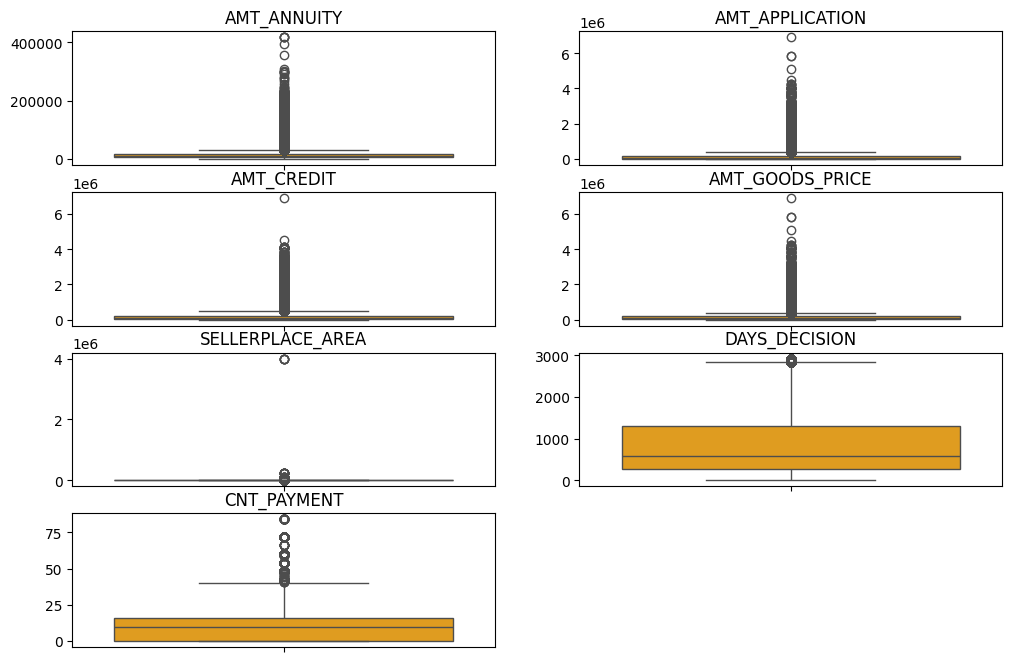

In [ ]:
plt.figure(figsize=(12,8))
for i,j in itertools.zip_longest(p_outlier_col, range(len(p_outlier_col))):
  plt.subplot(4,2,j+1)
  sns.boxplot(y=prevDF[i], orient='h', color='orange')
  plt.xlabel("")
  plt.ylabel("")
  plt.title(i)

**Insight:**

**It can be seen that in previous application data**
* **AMT_ANNUITY, AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE, SELLERPLACE_AREA have huge number of outliers.**
* **CNT_PAYMENT has few outlier values.**
* **DAYS_DECISION has little number of outliers indicating that these previous applications decisions were taken long back.**

# Data Analysis

Strategy:
The data analysis flow has been planned in following way :

* Imbalance in Data
* Categorical Data Analysis
* Categorical segmented Univariate Analysis
* Categorical Bi/Multivariate analysis
* Numeric Data Analysis
* Bi-furcation of databased based on TARGET data
* Correlation Matrix
* Numerical segmented Univariate Analysis
* Numerical Bi/Multivariate analysis

**Imbalance Analysis**

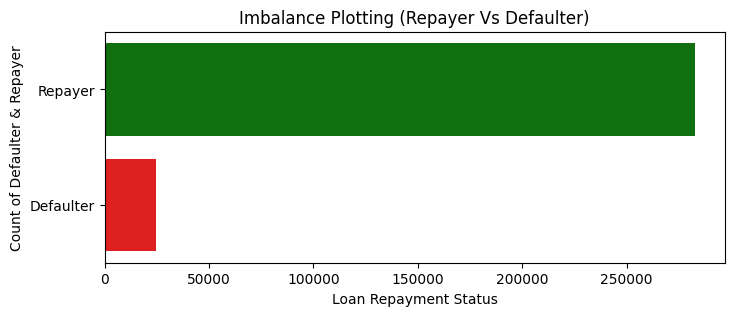

In [ ]:
plt.figure(figsize=(8,3))
sns.barplot(y=['Repayer', 'Defaulter'], x=appDF['TARGET'].value_counts(), palette=['g','r'], orient='h')
plt.xlabel('Loan Repayment Status')
plt.ylabel('Count of Defaulter & Repayer')
plt.title("Imbalance Plotting (Repayer Vs Defaulter)")
plt.show()

In [ ]:
#Ratio of imbalance percentage with respect to defaulter and repayer is given below

repayer=round(appDF['TARGET'].value_counts()[0]/len(appDF)*100,2)
print('Repayer percentage is {}%'.format(repayer))
defaulter=round(appDF['TARGET'].value_counts()[1]/len(appDF)*100,2)
print('Defaulter percentage is {}%'.format(defaulter))

print('Imbalance Ratio with respect to Repayer and Defaulter is given: {0:.2f}/1 approx'.format(repayer/defaulter))

Repayer percentage is 91.93%
Defaulter percentage is 8.07%
Imbalance Ratio with respect to Repayer and Defaulter is given: 11.39/1 approx


## 6.2 Plotting Functions

### Important Function for Univariate analysis

Creating a function for plotting Variables to do univariate analysis.
This function will create two plots
1. Count plot of given column w.r.t TARGET column
2. Percentage of defaulters within that column

The function is taking 6 arguments
1. dataset : to put the dataset we want to use
2. col : column name for which we need to the analysis
3. target_col : column name for with which we will be comparing
4. ylog : to have y-axis in log10 terms, in case the plot is not readable
5. x_label_angle : to maintain the orientation of x-axis labels
6. h_layout : to give horizontal layout of the subplots

In [ ]:
# Creating a function to find if the column is categorical or numerical
def data_type(dataset,col):
  if dataset[col].dtype==np.int64 or dataset[col].dtype==np.float64:
    return 'Numerical'
  if dataset[col].dtype=='category':
    return 'Categorical'

# Creating a function "univariate" to perform analysis one single variable with respect to target variable
def univariate(dataset,col,target_col,ylog=False,x_label_angle=False,h_layout=True):
  if data_type(dataset, col)=='Numerical':
    sns.distplot(dataset[col], hist=False)

  elif data_type(dataset,col)=='Categorical':
    val_count=dataset[col].value_counts()
    df1=pd.DataFrame({col:val_count.index, 'count':val_count.values})

    target1_percentage=dataset[col, target_col].groupby([col], as_index=False).mean()
    target1_percentage[target_col]=target1_percentage[target_col]*100
    target1_percentage.sort_values(by=target_col, inplace=True)

    # If the plot is not readable, use the log scale

    if(h_layout):
      fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(15,7))
    else:
      fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(25,35))

    # 1. Subplot 1: Count plot of the column
    s=sns.countplot(ax=ax1, x=col, data=dataset, hue=target_col)
    ax1.set_title(col, fontsize=20)
    ax1.legend('Repayer','Defaulter')
    ax1.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})

    if(x_label_angle):
      s.set_xticklabels(s.get_xticklabels(),rotation=75)

 # 2. Subplot 2: Percentage of defaulters within the column
    s=sns.barplot(ax=ax2, x=col, y=target_col, data=target1_percentage)
    ax2.set_title('Defaulters % in '+col,  fontsize=20)
    ax2.set_xlabel(col,fontdict={'fontsize' : 15, 'fontweight' : 3})
    ax2.set_ylabel(target_col,fontdict={'fontsize' : 15, 'fontweight' : 3})

    if(x_label_angle):
      s.set_xticklabels(s.get_xticklabels(),rotation=75)

  # If the plot is not readable, use the log scale

    if ylog:
      ax1.set_yscale('log')
      ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 15, 'fontweight' : 3})
    else:
      ax1.set_ylabel("Count",fontdict={'fontsize' : 15, 'fontweight' : 3})


    plt.show()

In [ ]:
# function for plotting repetitive rel plots in bivaritae numerical analysis
def bivariate_n(x,y,df,hue,kind, labels):
  plt.figure(figsize=(12,10))
  sns.relplot(x=x, y=y, data=df, kind=kind,hue=hue, legend=False)
  plt.legend(labels=labels)
  plt.xticks(rotation=45, ha='right')
  plt.show()

In [ ]:
# function for plotting repetitive barplots in bivariate categorical analysis
def bivariate_c(x,y,df,hue,figsize,labels):
  plt.figure(figsize=figsize)
  sns.barplot(x=x, y=y, data=df,hue=hue)
    # Defining aesthetics of Labels and Title of the plot using style dictionaries
  plt.xlabel(x,fontsize = 15)
  plt.ylabel(y,fontsize = 15)
  plt.title(col,fontsize = 20)
  plt.xticks(rotation=45, ha='right')
  plt.legend(labels = labels )
  plt.show()

In [ ]:
#function for plotting repetitive countplots in univariate categorical analysis on the merged df

def univariate_c_merged(col, df, hue, palette, ylog, figsize):
  plt.figure(figsize=figsize)
  ax=sns.countplot(x=col, data=df, hue=hue, palette=palette,order=df[col].value_counts().index)
  if ylog:
    plt.yscale('log')
    plt.ylabel("Count (log)",fontsize=15)
  else:
    plt.ylabel("Count",fontsize=15)

  plt.title(col , fontsize=20)
  plt.legend(loc = "upper right")
  plt.xticks(rotation=45, ha='right')

  plt.show()

In [ ]:
# Function to plot point plots
def pointplot(df, hue, x,y):
    plt.figure(figsize=(9,5))
    sns.pointplot(x=x, y=y, hue=hue, data=df)
    plt.title(x+" VS "+y,fontsize = 15)

In [ ]:
# storing numnercial and categorical columns as list in belows varibles
cat_col=list(appDF.select_dtypes(['category']).columns)
num_col=list(appDF.select_dtypes(['int','float']).columns)

## 6.3 Categorical Variables Analysis

### 6.3.1 Segmented Univariate Analysis

In [ ]:
def univariate_categorical(feature,ylog=False,label_rotation=False,horizontal_layout=True):
    temp = appDF[feature].value_counts()
    df1 = pd.DataFrame({feature: temp.index,'Number of contracts': temp.values})

    # Calculate the percentage of target=1 per category value
    cat_perc = appDF[[feature, 'TARGET']].groupby([feature],as_index=False).mean()
    cat_perc["TARGET"] = cat_perc["TARGET"]*100
    cat_perc.sort_values(by='TARGET', ascending=False, inplace=True)

    if(horizontal_layout):
        fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(9,6))
    else:
        fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10,18))

    # 1. Subplot 1: Count plot of categorical column
    # sns.set_palette("Set2")
    s = sns.countplot(ax=ax1,
                    x = feature,
                    data=appDF,
                    hue ="TARGET",
                    order=cat_perc[feature],
                    palette=['g','r'])

    # Define common styling
    ax1.set_title(feature, fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})
    ax1.legend(['Repayer','Defaulter'])

    # If the plot is not readable, use the log scale.
    if ylog:
        ax1.set_yscale('log')
        ax1.set_ylabel("Count (log)",fontdict={'fontsize' : 10, 'fontweight' : 3, 'color' : 'Blue'})


    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)

    # 2. Subplot 2: Percentage of defaulters within the categorical column
    s = sns.barplot(ax=ax2,
                    x = feature,
                    y='TARGET',
                    order=cat_perc[feature],
                    data=cat_perc,
                    palette='Set2')

    if(label_rotation):
        s.set_xticklabels(s.get_xticklabels(),rotation=90)
    plt.ylabel('Percent of Defaulters [%]', fontsize=10)
    plt.tick_params(axis='both', which='major', labelsize=10)
    ax2.set_title(feature + " Defaulter %", fontdict={'fontsize' : 15, 'fontweight' : 5, 'color' : 'Blue'})

    plt.show();


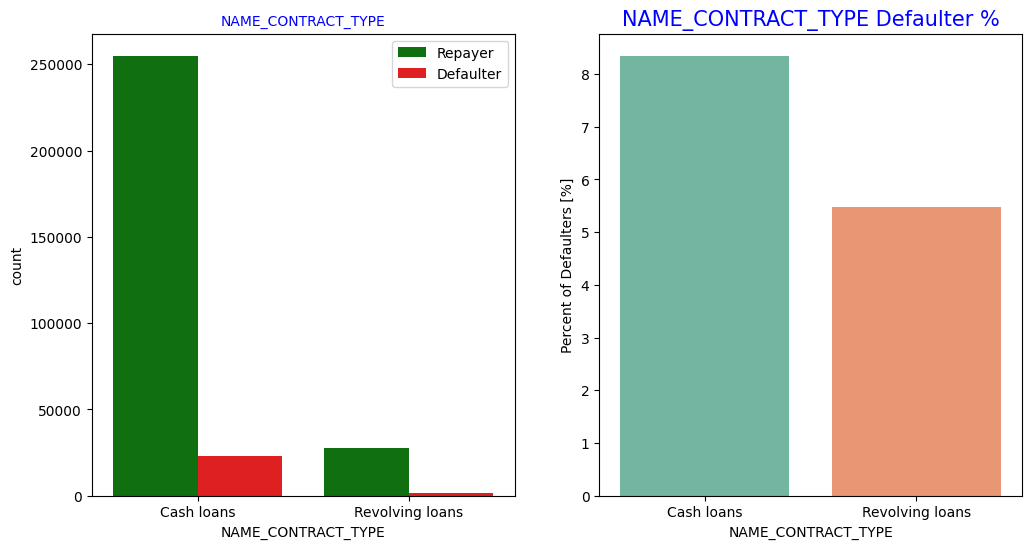

In [ ]:
#1 Checking the contract type based on loan repayment status
univariate_categorical("NAME_CONTRACT_TYPE",False,False,True)

**Inferences:**

Contract type: Revolving loans are just a small fraction (10%) from the total number of loans; in the same time, a larger amount of Revolving loans, comparing with their frequency, are not repaid.

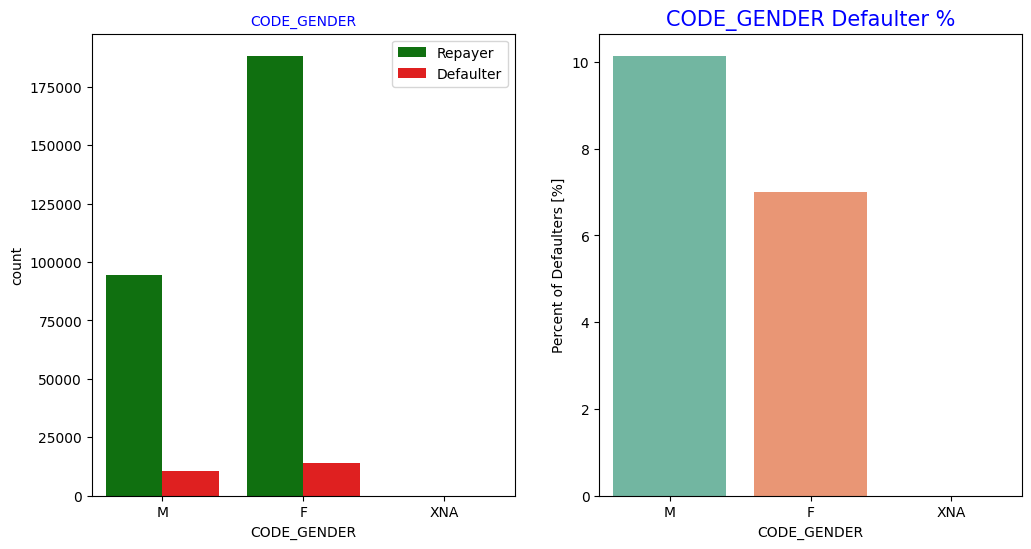

In [ ]:
#2 Checking the type of Gender on loan repayment status
univariate_categorical("CODE_GENDER",False,False,True)

**Inferences:**

The number of female clients is almost double the number of male clients. Based on the percentage of defaulted credits, males have a higher chance of not returning their loans (10%), comparing with women (7%)

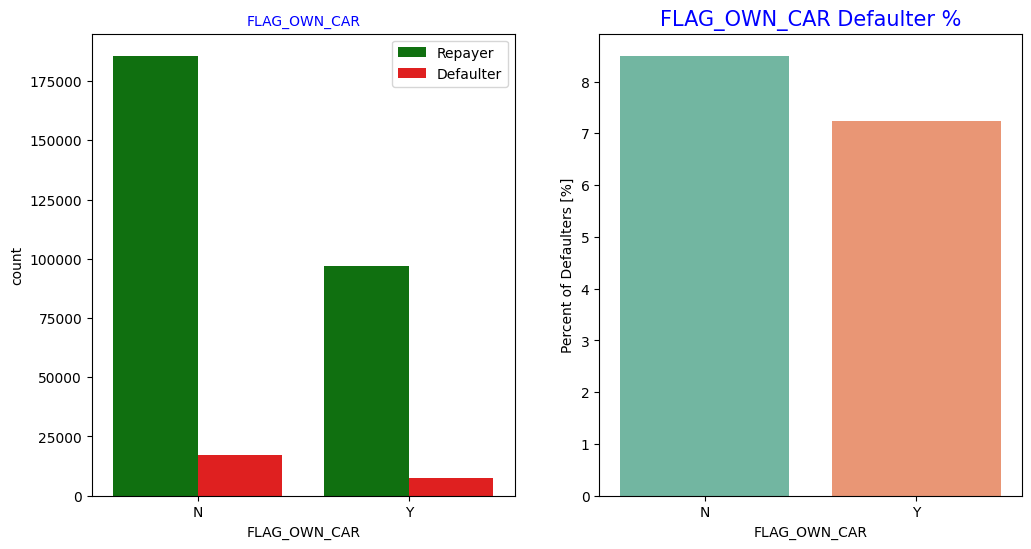

In [ ]:
# Checking if owning a car is related to loan repayment status
univariate_categorical("FLAG_OWN_CAR",False,False,True)

**Inferences:**

Clients who own a car are half in number of the clients who dont own a car. But based on the percentage of deault, there is no correlation between owning a car and loan repayment as in both cases the default percentage is almost same.

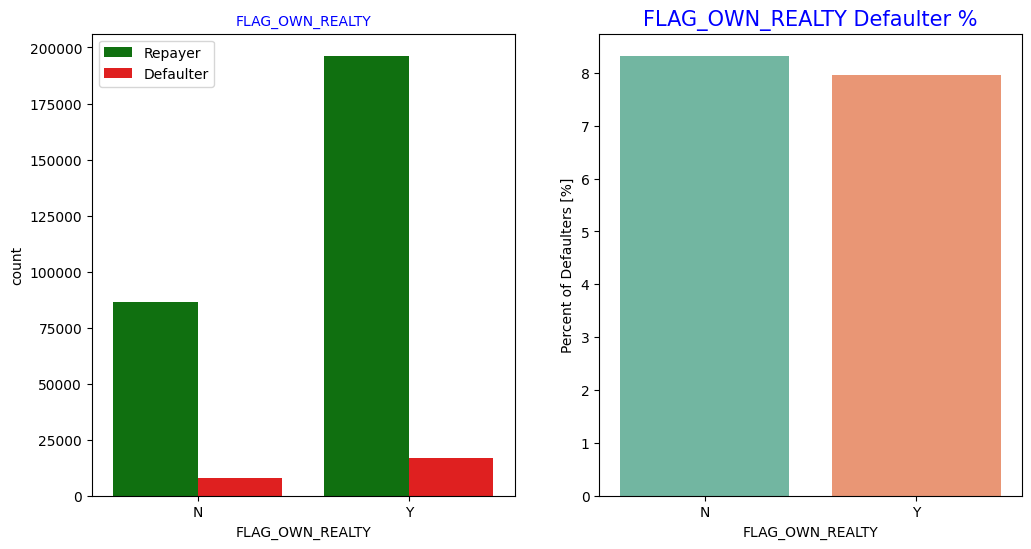

In [ ]:
#4 Checking if owning a real estate is related to loan repayment status
univariate_categorical("FLAG_OWN_REALTY",False,False,True)

**Inferences:**

The clients who own real estate are more than double of the ones that don't own. But the defaulting rate of both categories are around the same (~8%). Thus there is no correlation between owning a reality and defaulting the loan

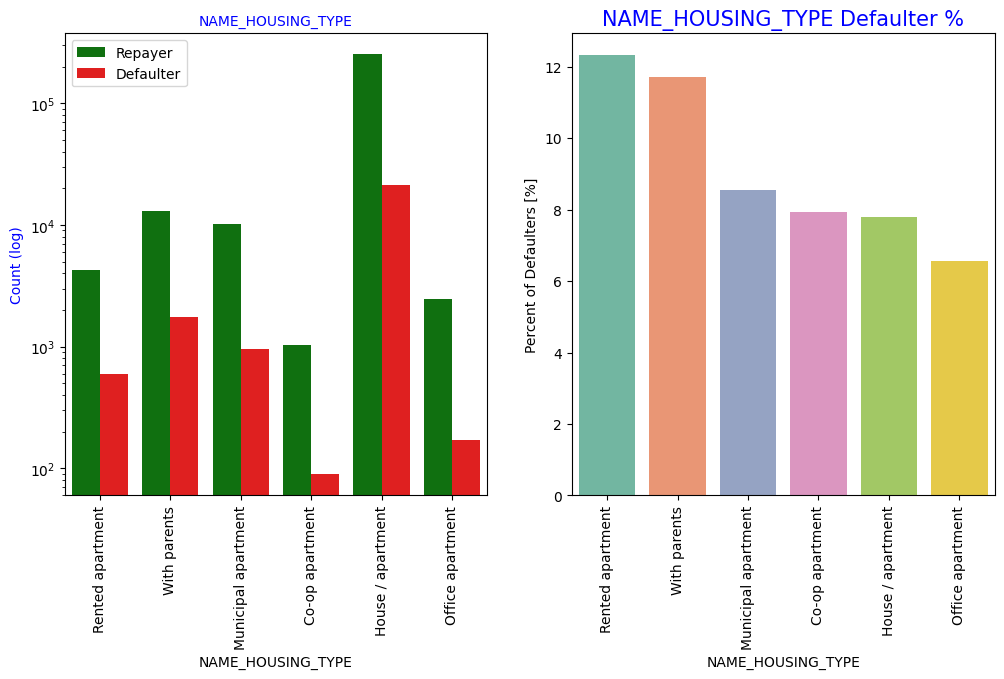

In [ ]:
# 5 Analyzing Housing Type based on loan repayment status
univariate_categorical('NAME_HOUSING_TYPE',True, True,True)

**Inferences:**

1. Majority of people live in House/apartment

2. People living in office apartments have lowest default rate

3. People living with parents (~11.5%) and living in rented apartments(>12%) have higher probability of defaulting

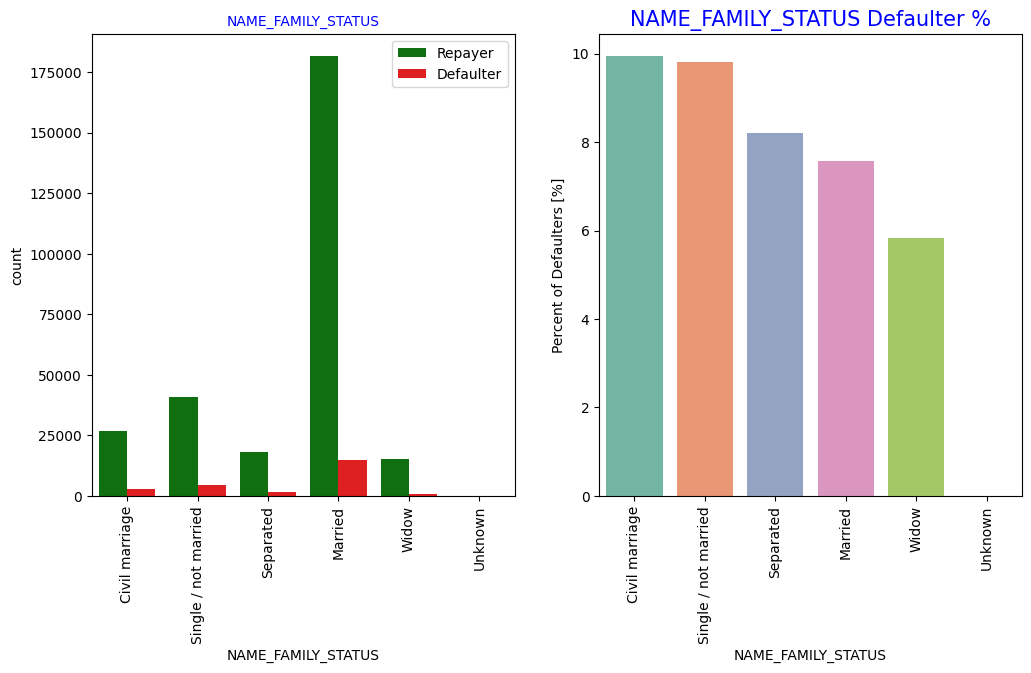

In [ ]:
# 6 Analyzing Family status based on loan repayment status
univariate_categorical('NAME_FAMILY_STATUS',False, True,True)

**Inferences:**

1. Most of the people who have taken loan are married, followed by Single/not married and civil marriage

2. In terms of percentage of not repayment of loan, Civil marriage has the highest percent of not repayment (10%), with Widow the lowest (exception being Unknown).

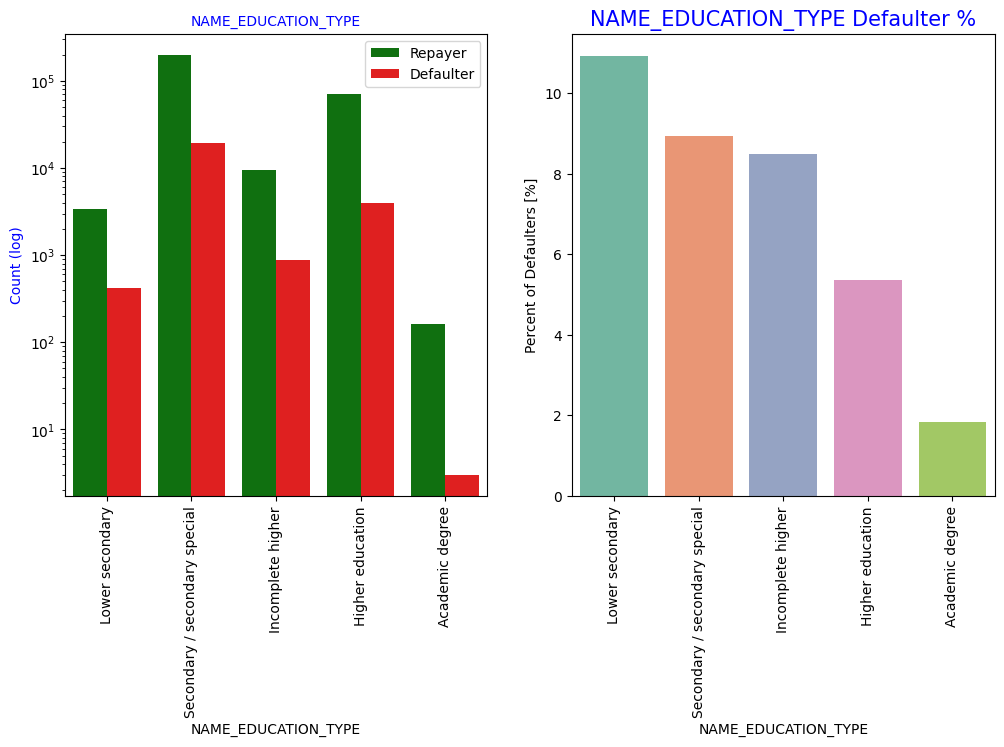

In [ ]:
# 7 Analyzing Education Type based on loan repayment status
univariate_categorical('NAME_EDUCATION_TYPE',True, True,True)

**Inferences:**

1. Majority of the clients have Secondary / secondary special education, followed by clients with Higher education. Only a very small number having an academic degree.

2. The Lower secondary category, although rare, have the largest rate of not returning the loan (11%). The people with Academic degree have less than 2% defaulting rate.

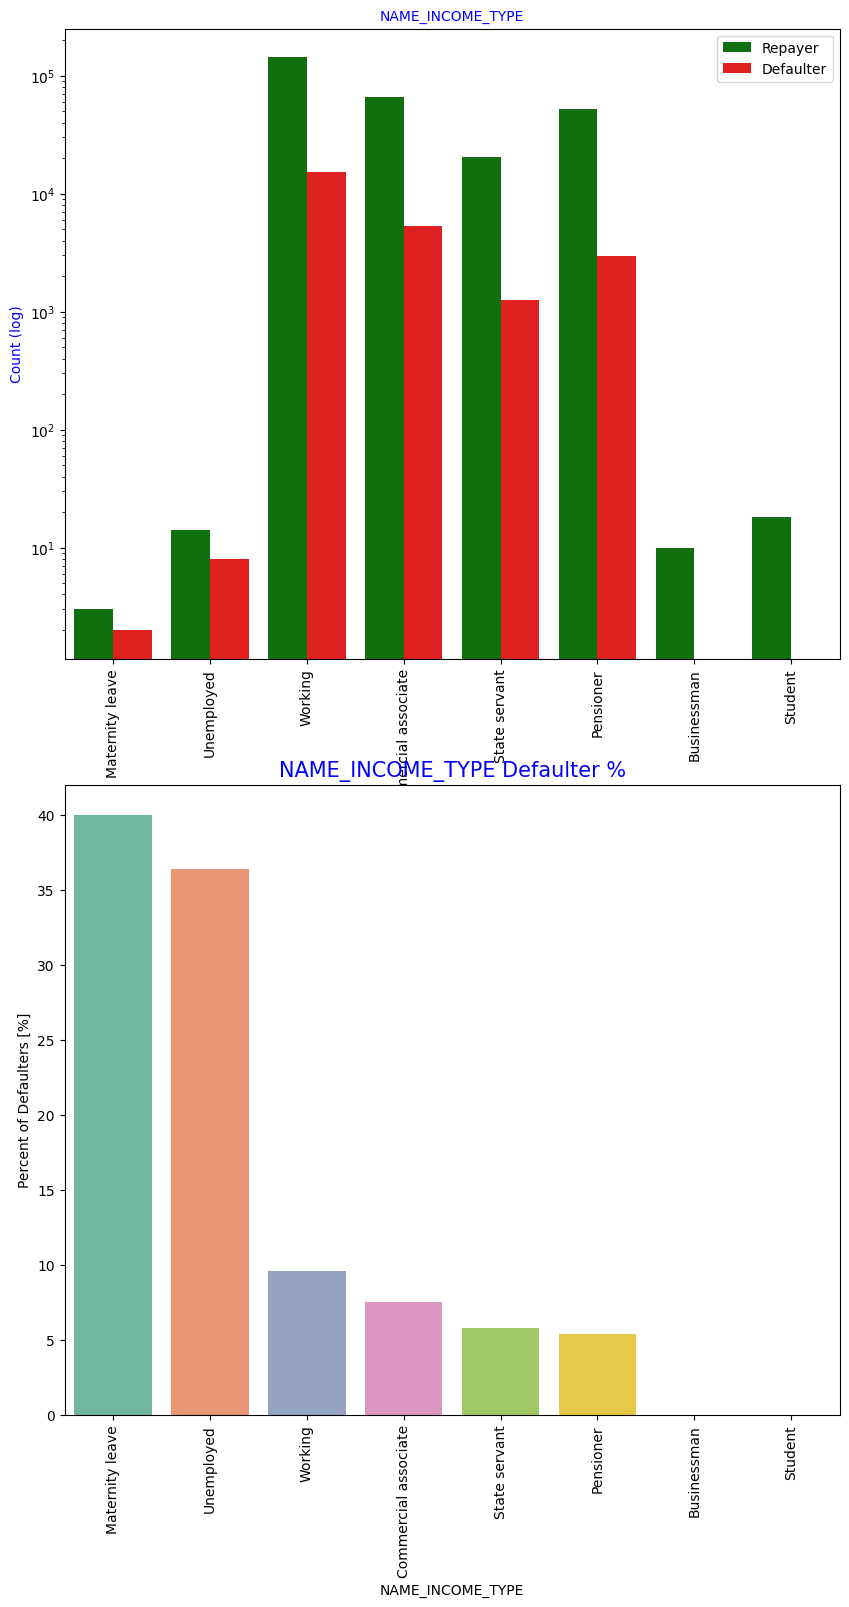

In [ ]:
# 8 Analyzing Income Type based on loan repayment status
univariate_categorical("NAME_INCOME_TYPE",True,True,False)

**Inferences:**

1. Most of applicants for loans have income type as Working, followed by Commercial associate, Pensioner and State servant.

2. The applicants with the type of income Maternity leave have almost 40% ratio of not returning loans, followed by Unemployed (37%). The rest of types of incomes are under the average of 10% for not returning loans.

3. Student and Businessmen, though less in numbers do not have any default record. Thus these two category are safest for providing loan.

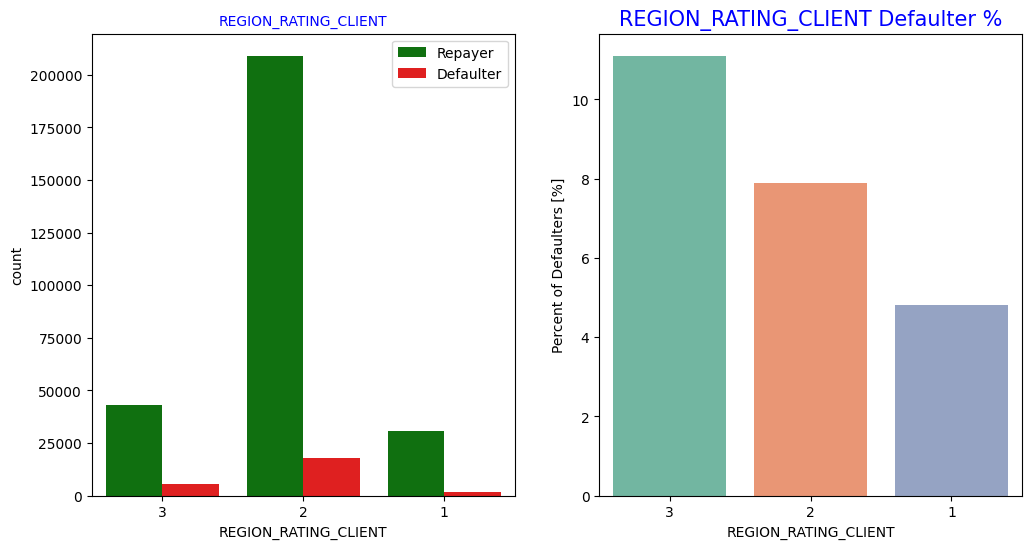

In [ ]:
# 9 Analyzing Region rating where applicant lives based on loan repayment status
univariate_categorical("REGION_RATING_CLIENT",False,False,True)

**Inferences:**

1. Most of the applicants are living in Region_Rating 2 place.
2. Region Rating 3 has the highest default rate (11%)
3. Applicant living in Region_Rating 1 has the lowest probability of defaulting, thus safer for approving loans

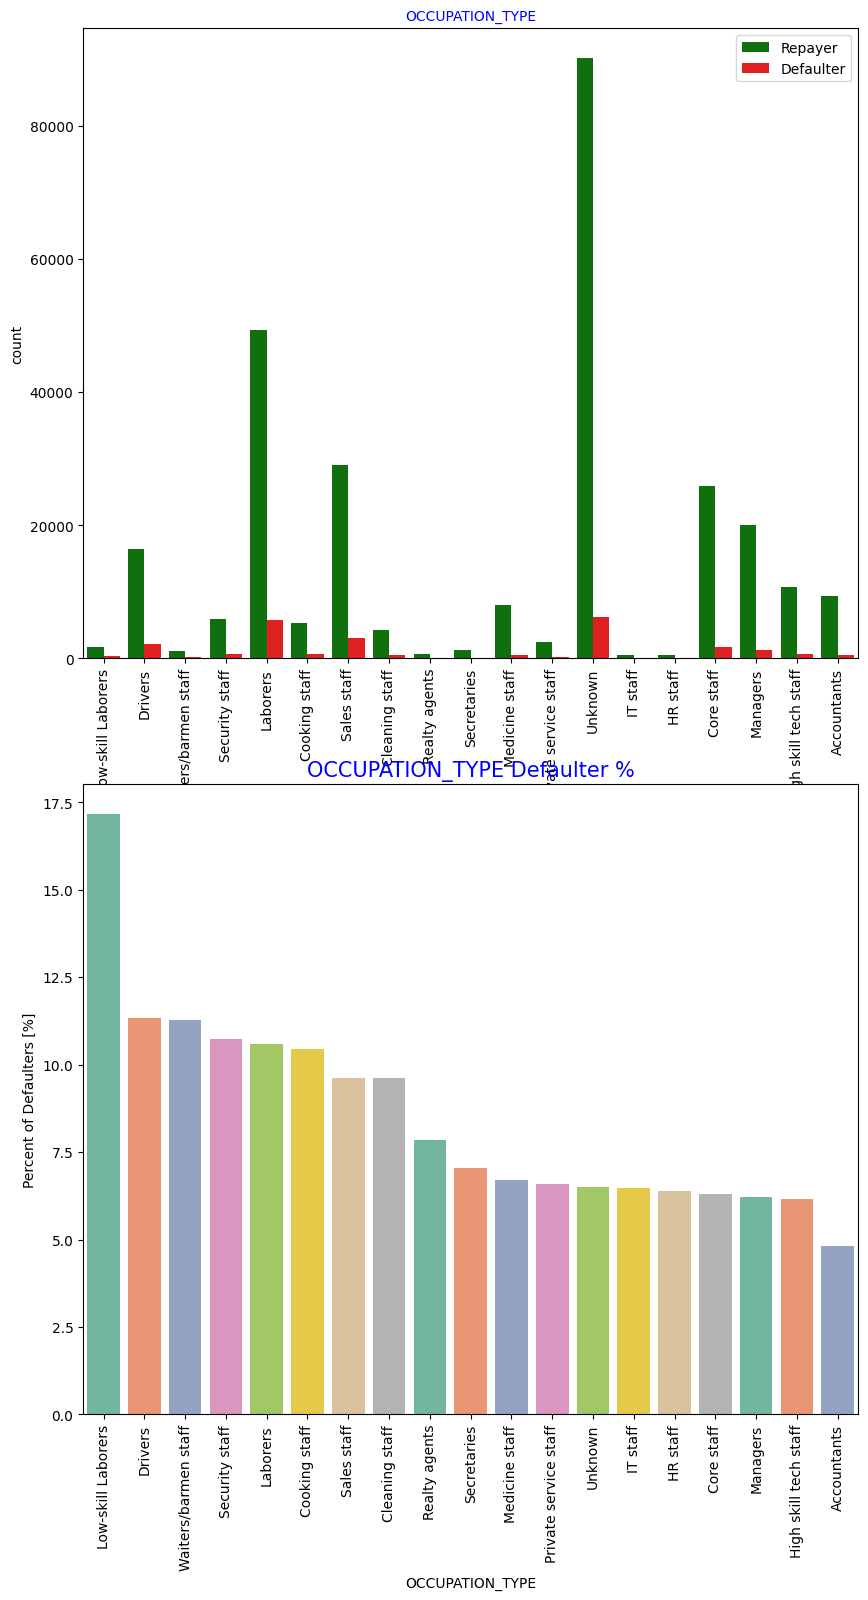

In [ ]:
# 10 Analyzing Occupation Type where applicant lives based on loan repayment status
univariate_categorical("OCCUPATION_TYPE",False,True,False)

**Inferences:**

1. Most of the loans are taken by Laborers, followed by Sales staff. IT staff take the lowest amount of loans.

2. The category with highest percent of not repaid loans are Low-skill Laborers (above 17%), followed by Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff.

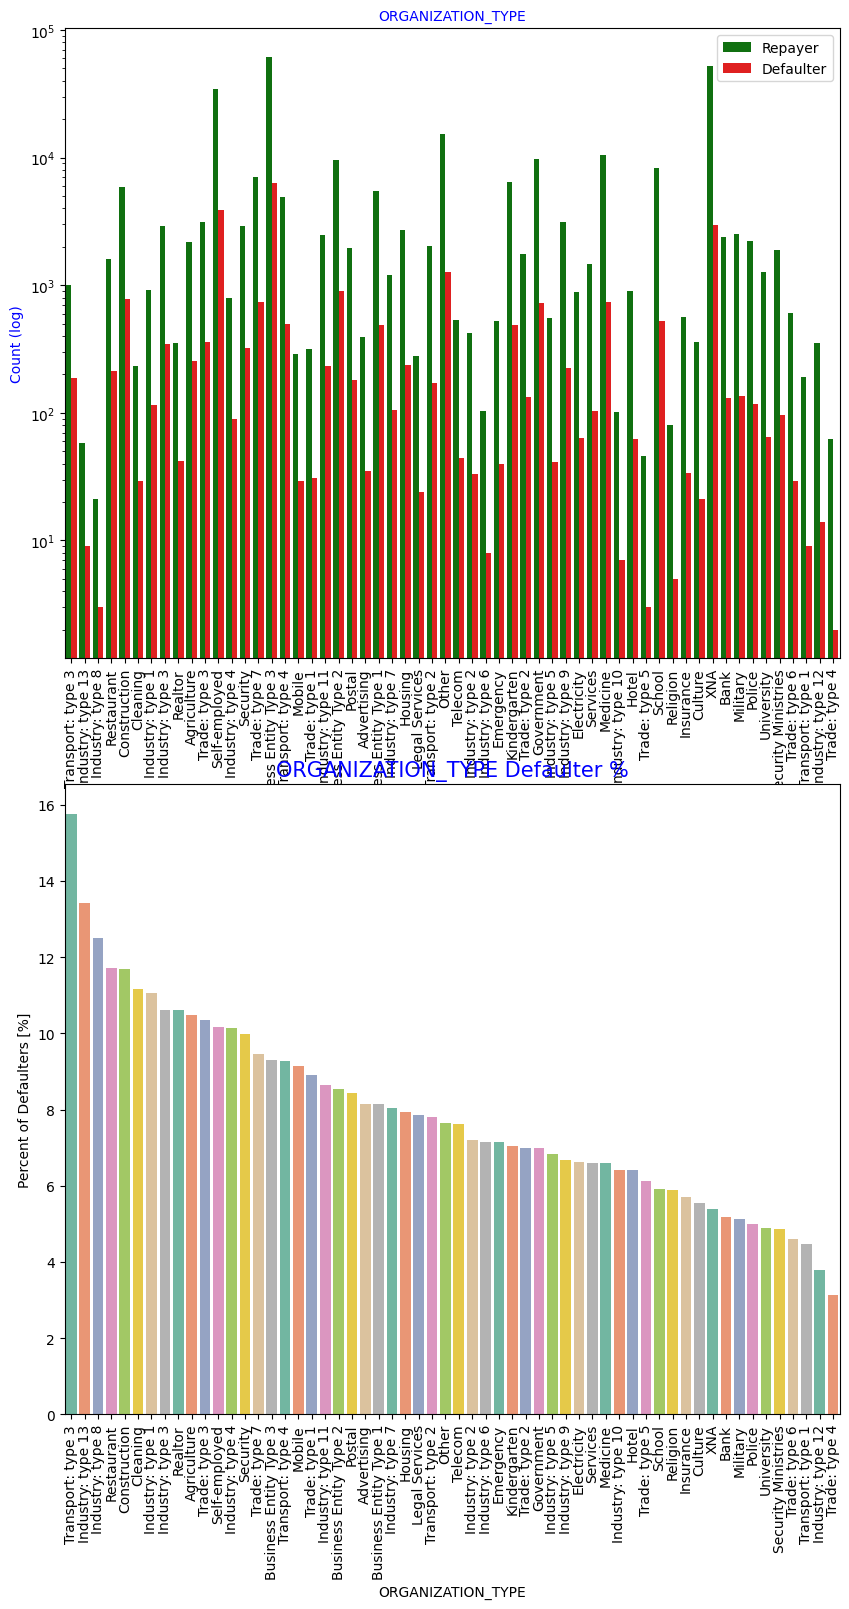

In [ ]:
# 11 Checking Loan repayment status based on Organization type
univariate_categorical("ORGANIZATION_TYPE",True,True,False)

**Inferences:**

1. Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.

2. Most of the people application for loan are from Business Entity Type 3.

3. For a very high number of applications, Organization type information is unavailable(XNA)

It can be seen that following category of organization type has lesser defaulters thus safer for providing loans:

  * Trade Type 4 and 5

  * Industry type 8

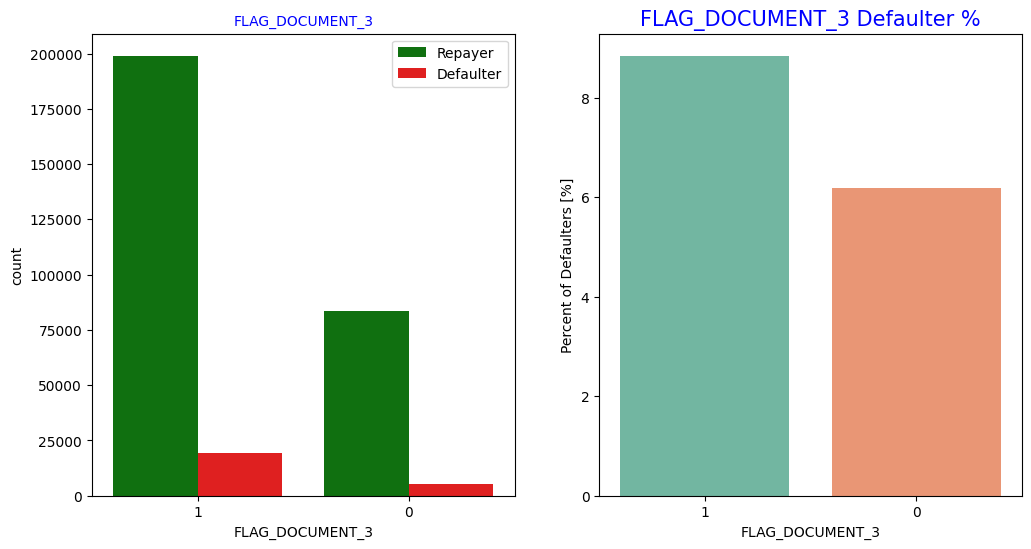

In [ ]:
# 12 Analyzing Flag_Doc_3 submission status based on loan repayment status
univariate_categorical("FLAG_DOCUMENT_3",False,False,True)

**Inferences:**

There is no significant correlation between repayers and defaulters in terms of submitting document 3 as we see even if applicants have submitted the document, they have defaulted a slightly more (~9%) than who have not submitted the document (6%)

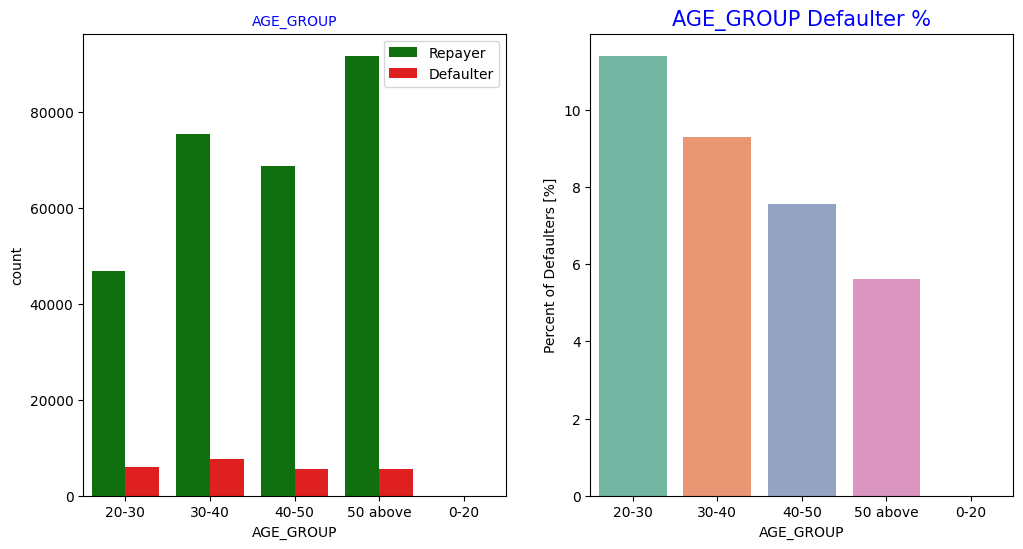

In [ ]:
# 13 Analyzing Age Group based on loan repayment status
univariate_categorical("AGE_GROUP",False,False,True)

**Inferences:**

1. People in the age group range 20-40 have higher probability of defaulting.

2. People above age of 50 have low probability of defailting

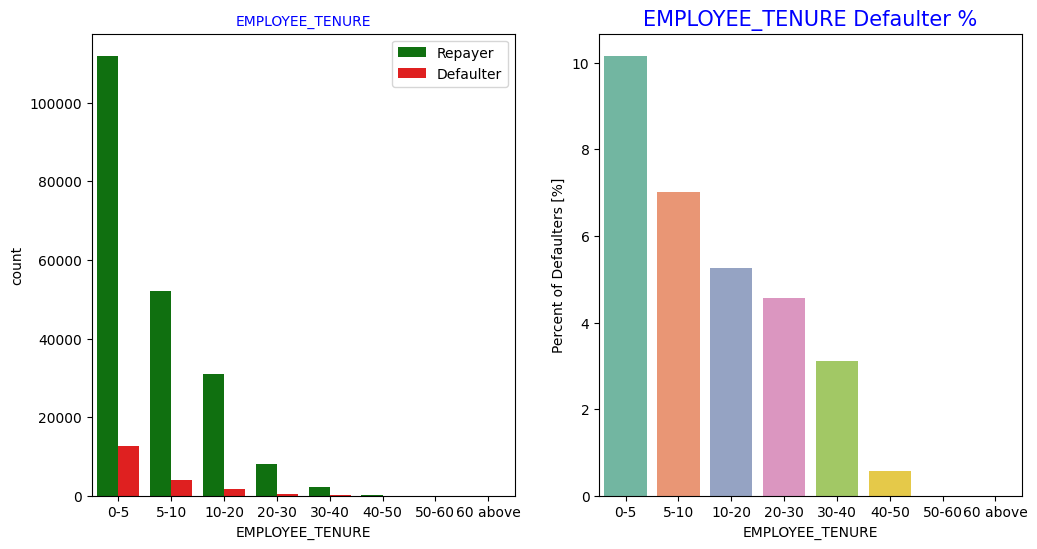

In [ ]:
# 15 Analyzing Employment_Year based on loan repayment status
univariate_categorical("EMPLOYEE_TENURE",False,False,True)

**Inferences:**

1. Majority of the applicants have been employeed in between 0-5 years. The defaulting rating of this group is also the highest which is 10%.

2. With increase of employment year, defaulting rate is gradually decreasing with people having 40+ year experience having less than 1% default rate

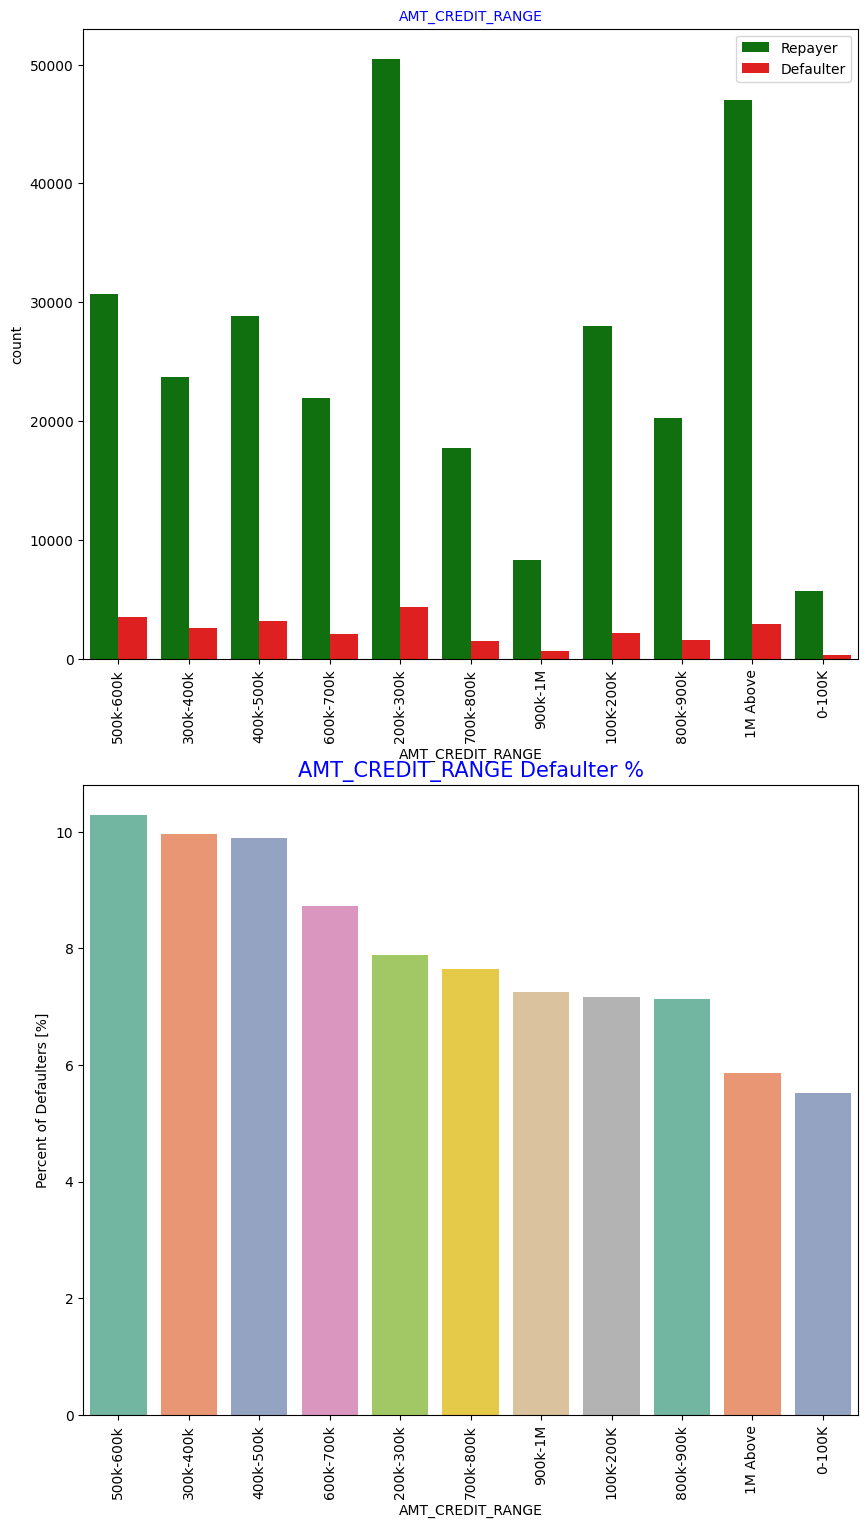

In [ ]:
# 16 Analyzing Amount_Credit based on loan repayment status
univariate_categorical("AMT_CREDIT_RANGE",False,True,False)

**Inferences:**

1. More than 80% of the loan provided are for amount less than 900,000.

2. People who get loan for 300-600k tend to default more than others.

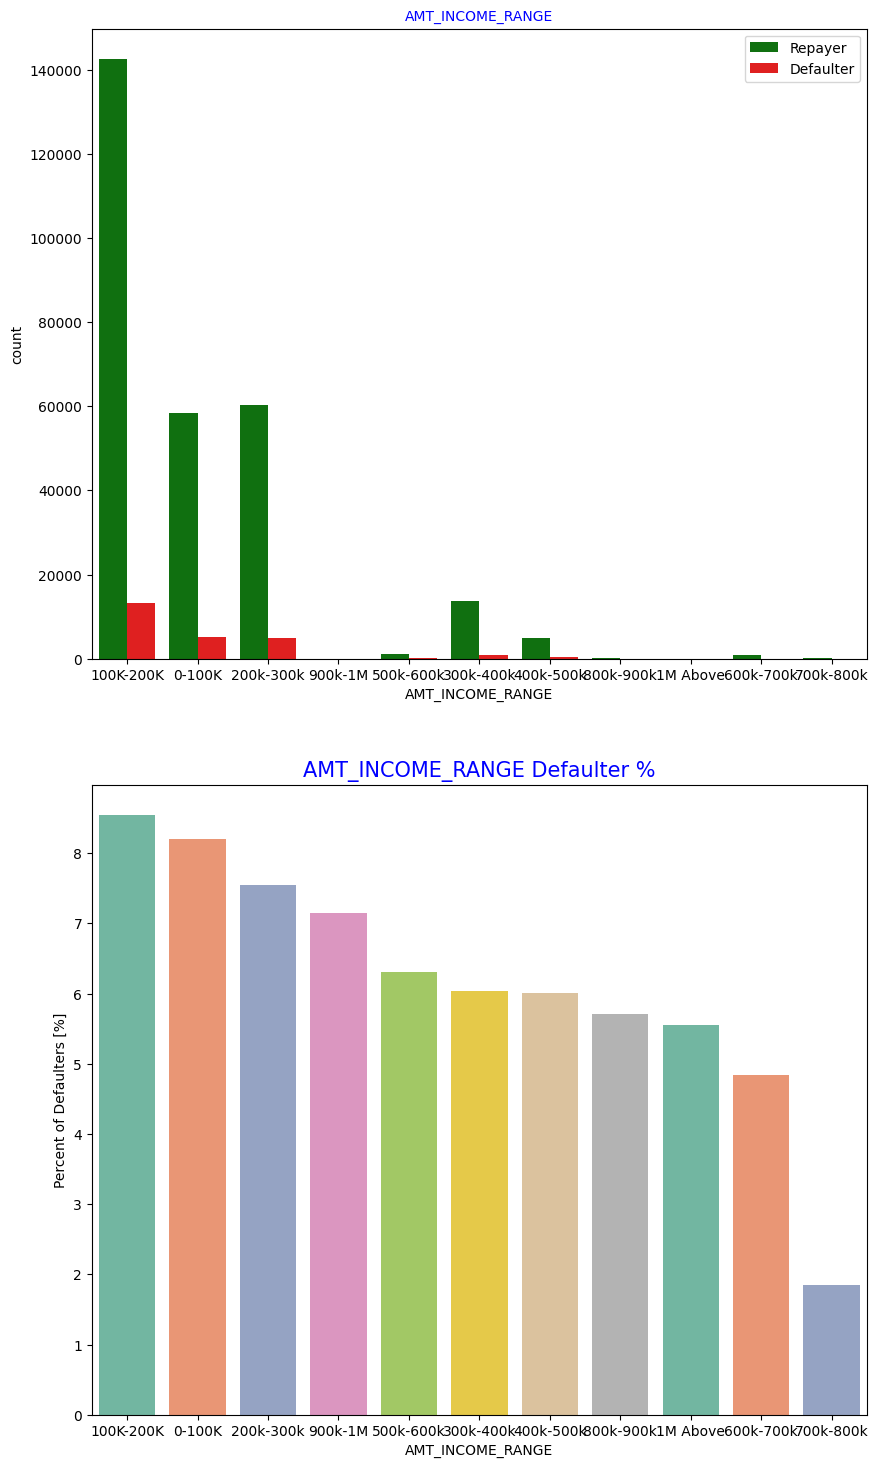

In [ ]:
# 17 Analyzing Amount_Income Range based on loan repayment status
univariate_categorical("AMT_INCOME_RANGE",False,False,False)

**Inferences:**

1. 90% of the applications have Income total less than 300,000.

2. Application with Income less than 300,000 has high probability of defaulting.

3. Applicant with Income more than 700,000 are less likely to default

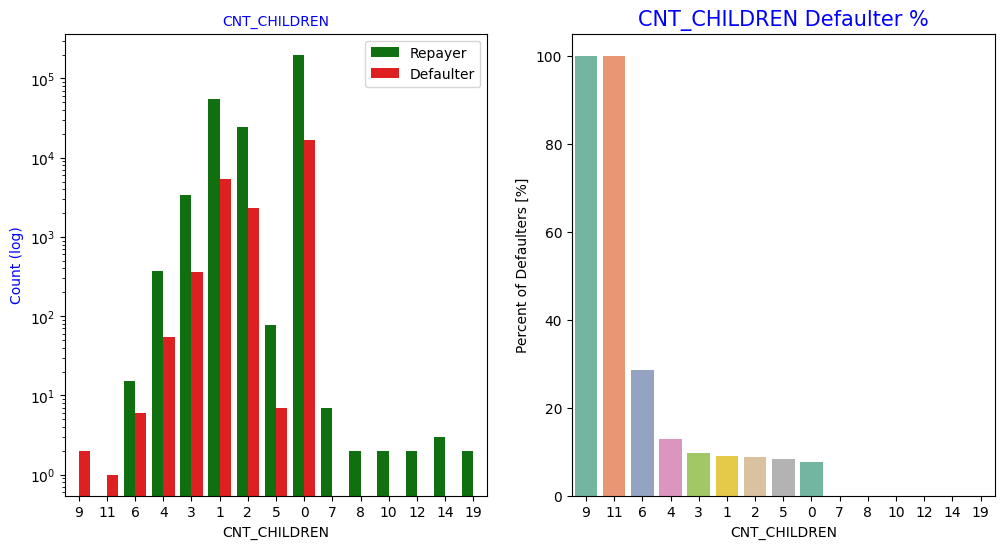

In [ ]:
# 18 Analyzing Number of children based on loan repayment status
univariate_categorical("CNT_CHILDREN",True)

**Inferences:**

1. Most of the applicants do not have children.

2. Very few clients have more than 3 children.

3. Client who have more than 4 children has a very high default rate with child count 9 and 11 showing 100% default rate

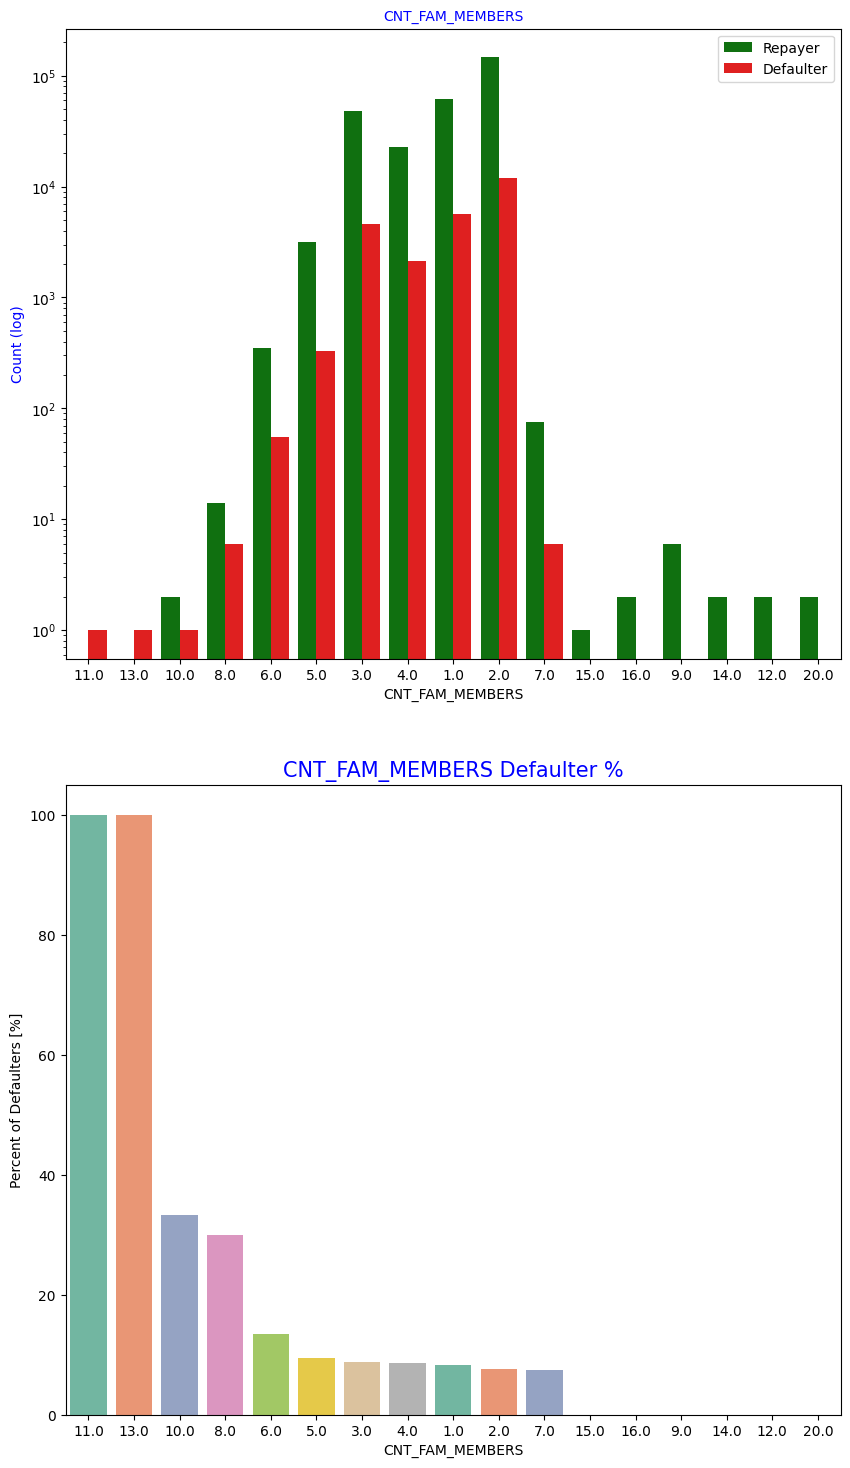

In [ ]:
# 20 Analyzing Number of family members based on loan repayment status
univariate_categorical("CNT_FAM_MEMBERS",True, False, False)

**Inferences:**

Family member follows the same trend as children where having more family members increases the risk of defaulting

### Categorical Bi/Multivariate Analysis

In [ ]:
appDF.groupby('NAME_INCOME_TYPE')['AMT_INCOME_TOTAL'].describe()

count      mean       std     min    25%     50%      75%        max
NAME_INCOME_TYPE                                                                             
Businessman               10.0  6.525000  6.272260  1.8000  2.250  4.9500  8.43750    22.5000
Commercial associate   71617.0  2.029553  1.479742  0.2655  1.350  1.8000  2.25000   180.0009
Maternity leave            5.0  1.404000  1.268569  0.4950  0.675  0.9000  1.35000     3.6000
Pensioner              55362.0  1.364013  0.766503  0.2565  0.900  1.1700  1.66500    22.5000
State servant          21703.0  1.797380  1.008806  0.2700  1.125  1.5750  2.25000    31.5000
Student                   18.0  1.705000  1.066447  0.8100  1.125  1.5750  1.78875     5.6250
Unemployed                22.0  1.105364  0.880551  0.2655  0.540  0.7875  1.35000     3.3750
Working               158774.0  1.631699  3.075777  0.2565  1.125  1.3500  2.02500  1170.0000

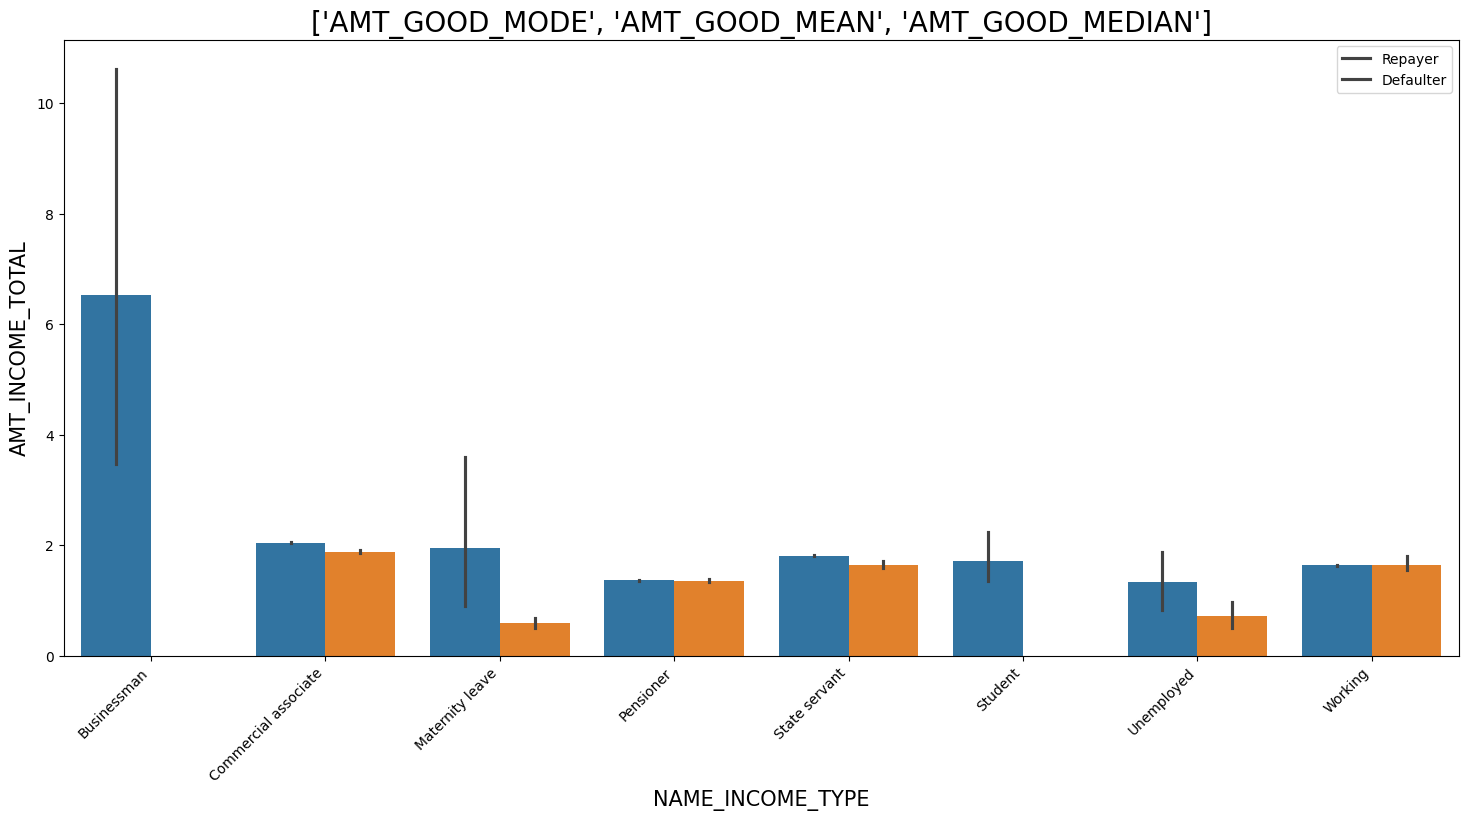

In [ ]:
# Income type vs Income Amount Range on a Seaborn Barplot
bivariate_c('NAME_INCOME_TYPE','AMT_INCOME_TOTAL', appDF, 'TARGET',(18,8),['Repayer', 'Defaulter'] )

**Inferences:**

It can be seen that Businessman income is the highest and the estimated range with default 95% confidence level seem to indicate that the income of a Businessman could be in the range of slightly close to 4 lakhs and slightly above 10 lakhs

### Numeric Variables Analysis

**Bisecting the app_data dataframe based on Target value 0 and 1 for correlation and other analysis**

In [ ]:
#Listing all the columnns of dataframe "appDF"
appDF.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CRED

In [ ]:
# bisecting the app_data dataframe based on Target value 0 and 1 for correlation and other analysis

cols_for_correlation = [ 'NAME_CONTRACT_TYPE','CODE_GENDER', 'FLAG_OWN_REALTY',
                        'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
                        'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
                        'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
                        'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
                        'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
                        'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
                        'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE',
                        'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_3',
                        'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR']

# Repayers dataframe
Repayer_df = appDF.loc[appDF['TARGET']==0, cols_for_correlation]

# Defaulters dataframe
Defaulter_df = appDF.loc[appDF['TARGET']==1, cols_for_correlation]

In [ ]:
len(cols_for_correlation)

41

**Correlation between numeric variable**

In [ ]:
corr_repayer = Repayer_df.corr(numeric_only=True)
corr_df_repayer = corr_repayer.where(np.triu(np.ones(corr_repayer.shape),k=1).astype(np.bool_)).unstack().reset_index()
corr_df_repayer.columns =['VAR1','VAR2','Correlation']
corr_df_repayer.dropna(subset = ["Correlation"], inplace = True)
corr_df_repayer["Correlation"]=corr_df_repayer["Correlation"].abs()
corr_df_repayer.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_repayer.head(10)

VAR1              VAR2  Correlation
94     AMT_GOODS_PRICE        AMT_CREDIT     0.987250
230    CNT_FAM_MEMBERS      CNT_CHILDREN     0.878571
95     AMT_GOODS_PRICE       AMT_ANNUITY     0.776686
71         AMT_ANNUITY        AMT_CREDIT     0.771309
167      DAYS_EMPLOYED        DAYS_BIRTH     0.626114
70         AMT_ANNUITY  AMT_INCOME_TOTAL     0.418953
93     AMT_GOODS_PRICE  AMT_INCOME_TOTAL     0.349462
47          AMT_CREDIT  AMT_INCOME_TOTAL     0.342799
138         DAYS_BIRTH      CNT_CHILDREN     0.336966
190  DAYS_REGISTRATION        DAYS_BIRTH     0.333151

<Axes: >

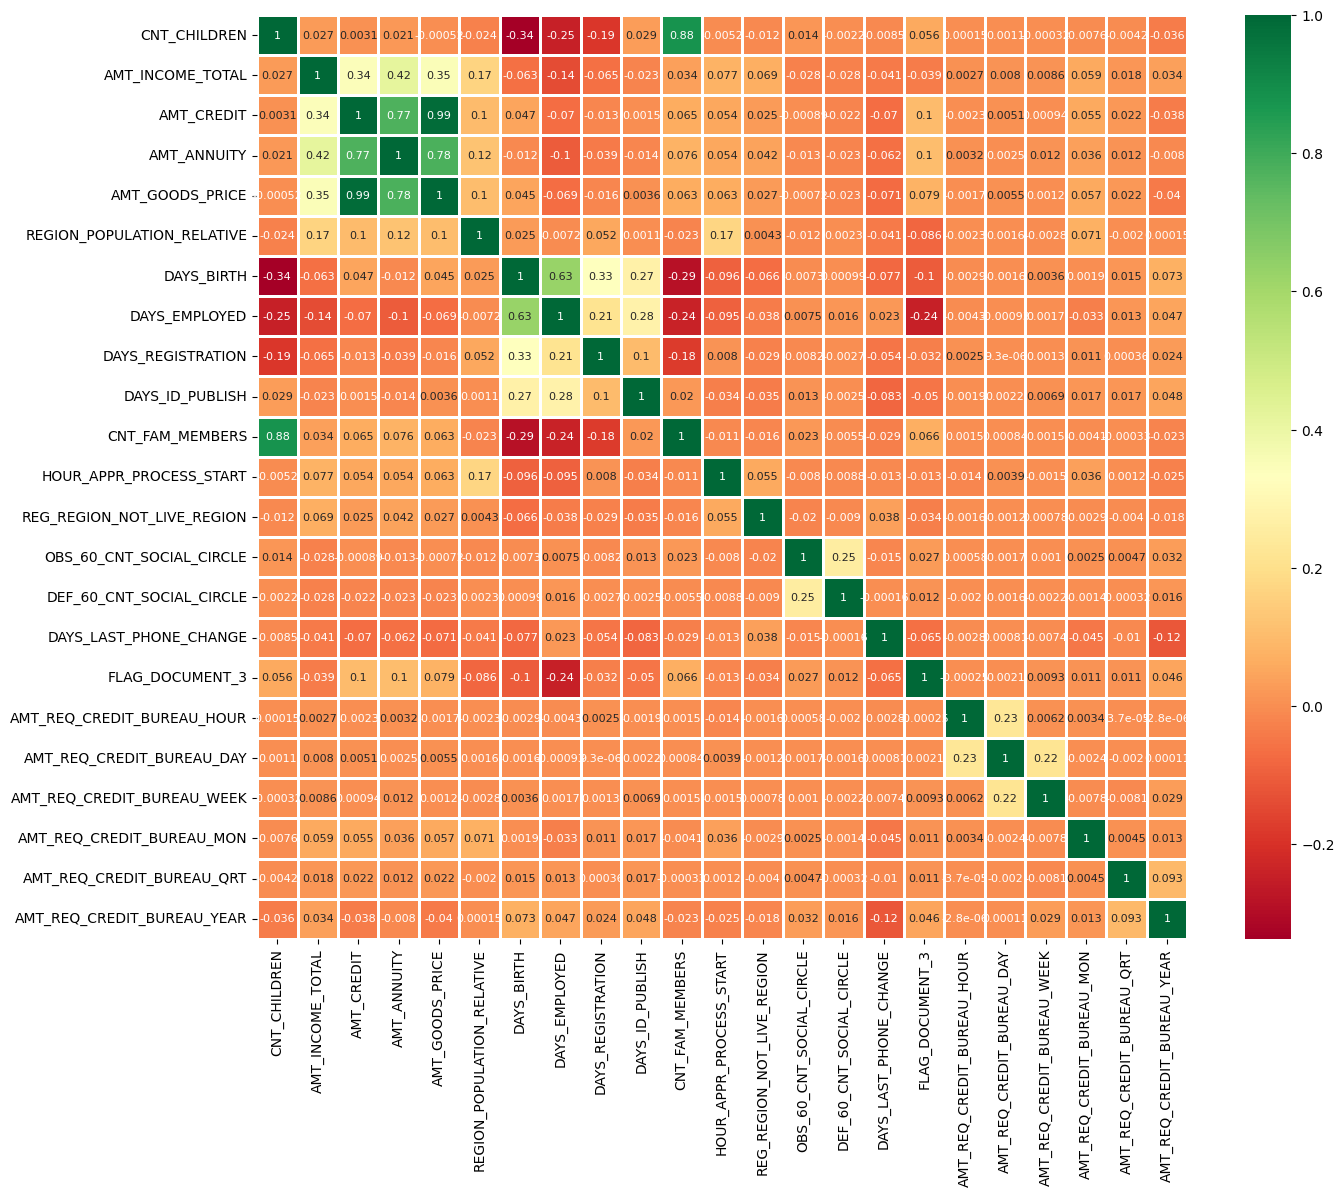

In [ ]:
#plotting heatmap to see linear correlation amoung Repayers
plt.figure(figsize=(15,12))
sns.heatmap(Repayer_df.corr(numeric_only=True), cmap='RdYlGn', annot=True, linewidth=1,annot_kws={"fontsize":8})

**Inferences:**
**Correlating factors amongst repayers**

**1. Credit amount is highly correlated with:**
* **Goods Price Amount**
* **Loan Annuity**
* **Total Income**

**2. We can also see that repayers have high correlation in number of days employed.**

In [ ]:
# Getting the top 10 correlation for the Defaulter data

corr_defaulter = Defaulter_df.corr(numeric_only=True)
corr_df_Defaulter = corr_defaulter.where(np.triu(np.ones(corr_defaulter.shape),k=1).astype(np.bool_)).unstack().reset_index()
corr_df_Defaulter.columns =['VAR1','VAR2','Correlation']
corr_df_Defaulter.dropna(subset = ["Correlation"], inplace = True)
corr_df_Defaulter["Correlation"]=corr_df_Defaulter["Correlation"].abs()
corr_df_Defaulter.sort_values(by='Correlation', ascending=False, inplace=True)
corr_df_Defaulter.head(10)

VAR1                      VAR2  Correlation
94            AMT_GOODS_PRICE                AMT_CREDIT     0.983103
230           CNT_FAM_MEMBERS              CNT_CHILDREN     0.885484
95            AMT_GOODS_PRICE               AMT_ANNUITY     0.752699
71                AMT_ANNUITY                AMT_CREDIT     0.752195
167             DAYS_EMPLOYED                DAYS_BIRTH     0.582185
190         DAYS_REGISTRATION                DAYS_BIRTH     0.289114
375           FLAG_DOCUMENT_3             DAYS_EMPLOYED     0.272169
335  DEF_60_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE     0.264159
138                DAYS_BIRTH              CNT_CHILDREN     0.259109
213           DAYS_ID_PUBLISH                DAYS_BIRTH     0.252863

<Axes: >

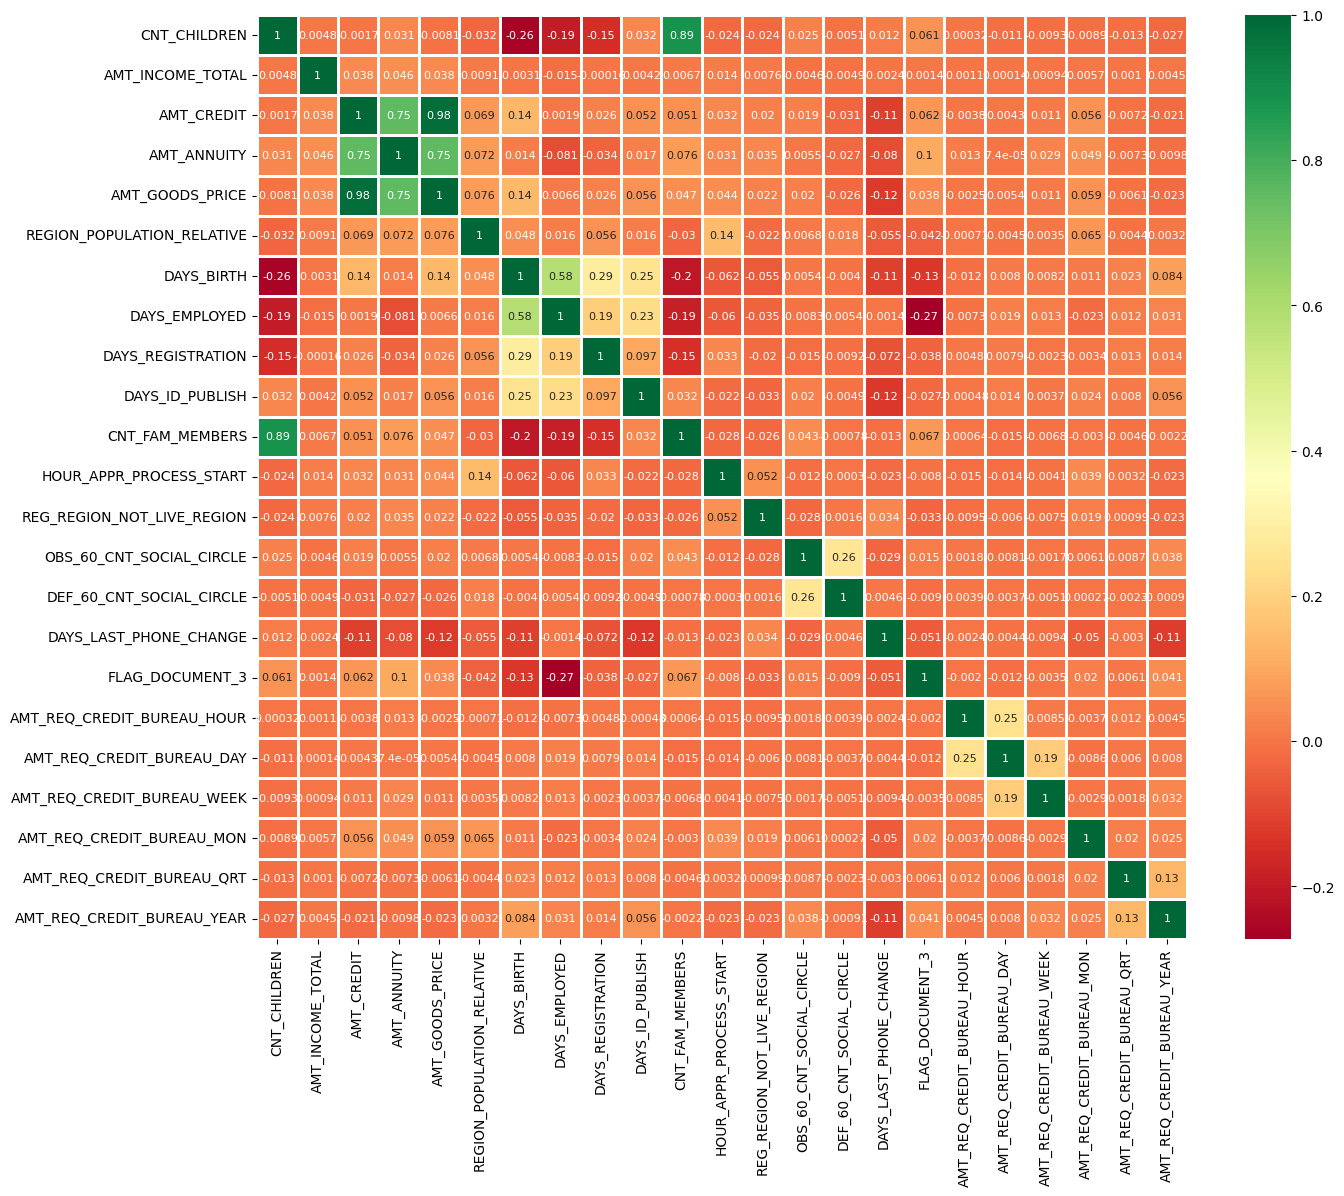

In [ ]:
#plotting heatmap to see linear correlation amoung Repayers
plt.figure(figsize=(15,12))
sns.heatmap(Defaulter_df.corr(numeric_only=True), cmap='RdYlGn', annot=True, linewidth=1,annot_kws={"fontsize":8})

**Inferences: Correlating factors amongst repayers**
* **Credit amount is highly correlated with good price amount which is same as repayers.**
* **Loan annuity correlation with credit amount has slightly reduced in defaulters(0.75) when compared to repayers(0.77)**
* **We can also see that repayers have high correlation in number of days employed(0.62) when compared to defaulters(0.58).**
* **There is a severe drop in the correlation between total income of the client and the credit amount(0.038) amongst defaulters whereas it is 0.342 among repayers.**
* **Days_birth and number of children correlation has reduced to 0.259 in defaulters when compared to 0.337 in repayers.**
* **There is a slight increase in defaulted to observed count in social circle among defaulters(0.264) when compared to repayers(0.254)**

### Numerical Univariate Analysis

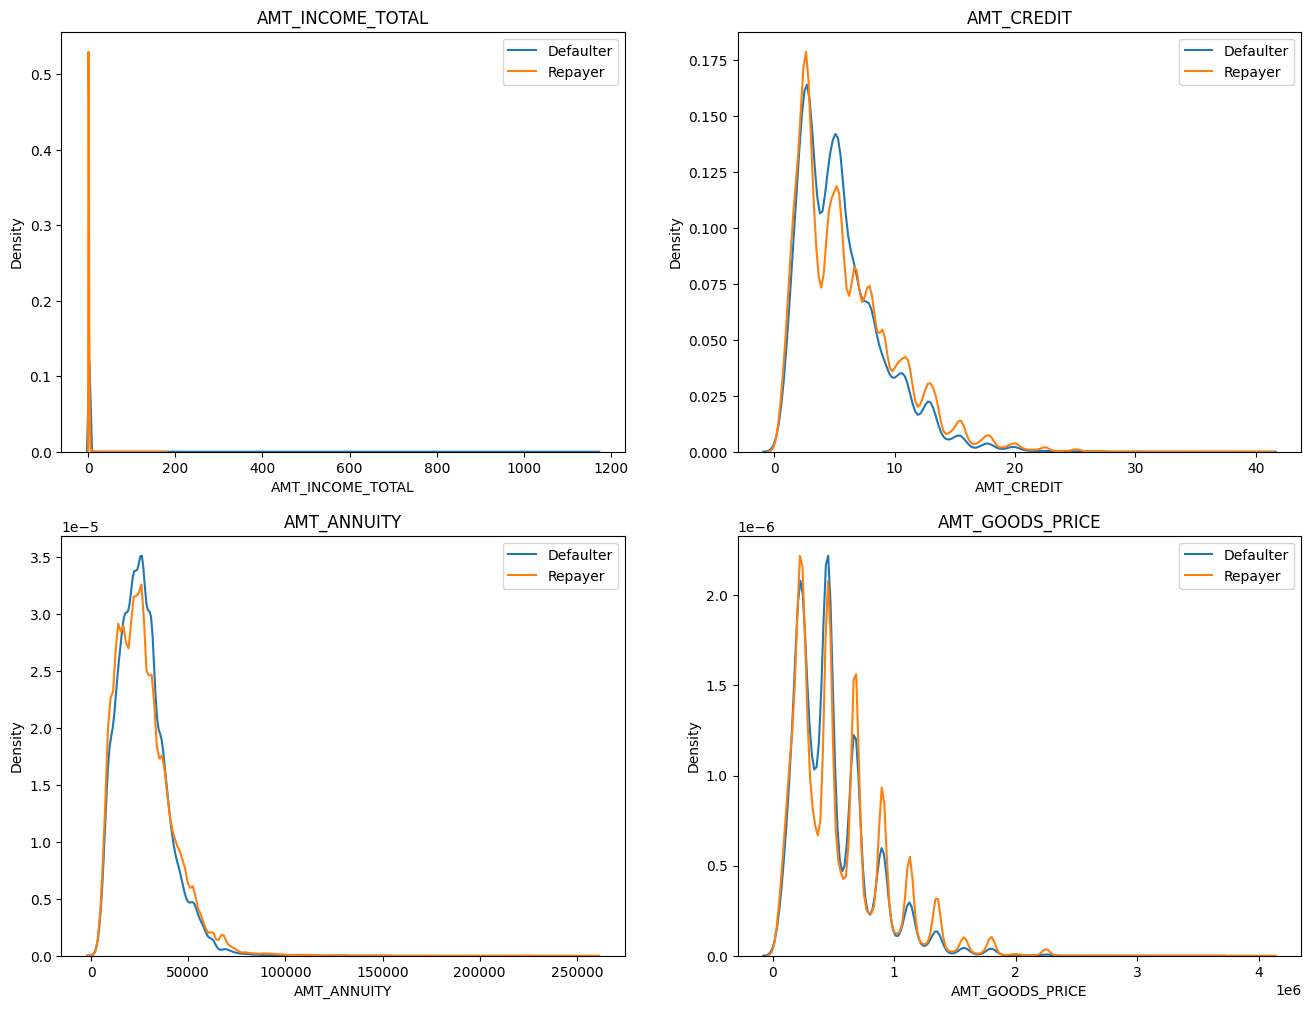

In [ ]:
# Plotting the numerical columns related to amount as distribution plot to see density
amount=appDF[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE']]

fig=plt.figure(figsize=(16,12))

for i in enumerate(amount):
  plt.subplot(2,2,i[0]+1)
  sns.distplot(Defaulter_df[i[1]],hist=False, label='Defaulter' )
  sns.distplot(Repayer_df[i[1]], hist=False, label='Repayer')
  plt.title(i[1])
  plt.legend()
plt.show()

**Inferences:**

1. Most no of loans are given for goods price below 10 lakhs.

2. Most people pay annuity below 50K for the credit loan.

3. Credit amount of the loan is mostly less then 10 lakhs.

4. The repayers and defaulters distribution overlap in all the plots and hence we cannot use any of these variables in isolation to make a decision

### Numerical Bivariate Analysis

<Figure size 1200x1000 with 0 Axes>

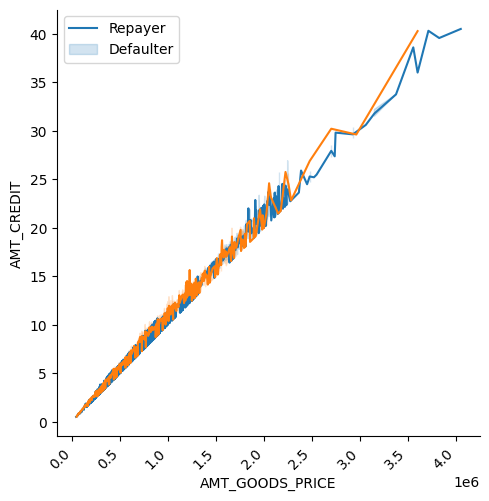

In [ ]:
# Checking the relationship between Goods price and credit and comparing with loan repayment staus
bivariate_n('AMT_GOODS_PRICE', 'AMT_CREDIT',  appDF, 'TARGET', 'line', ['Repayer','Defaulter'])

**Inferences:**
* **When the credit amount goes beyond 30 Lakhs, there is an increase in defaulters.**

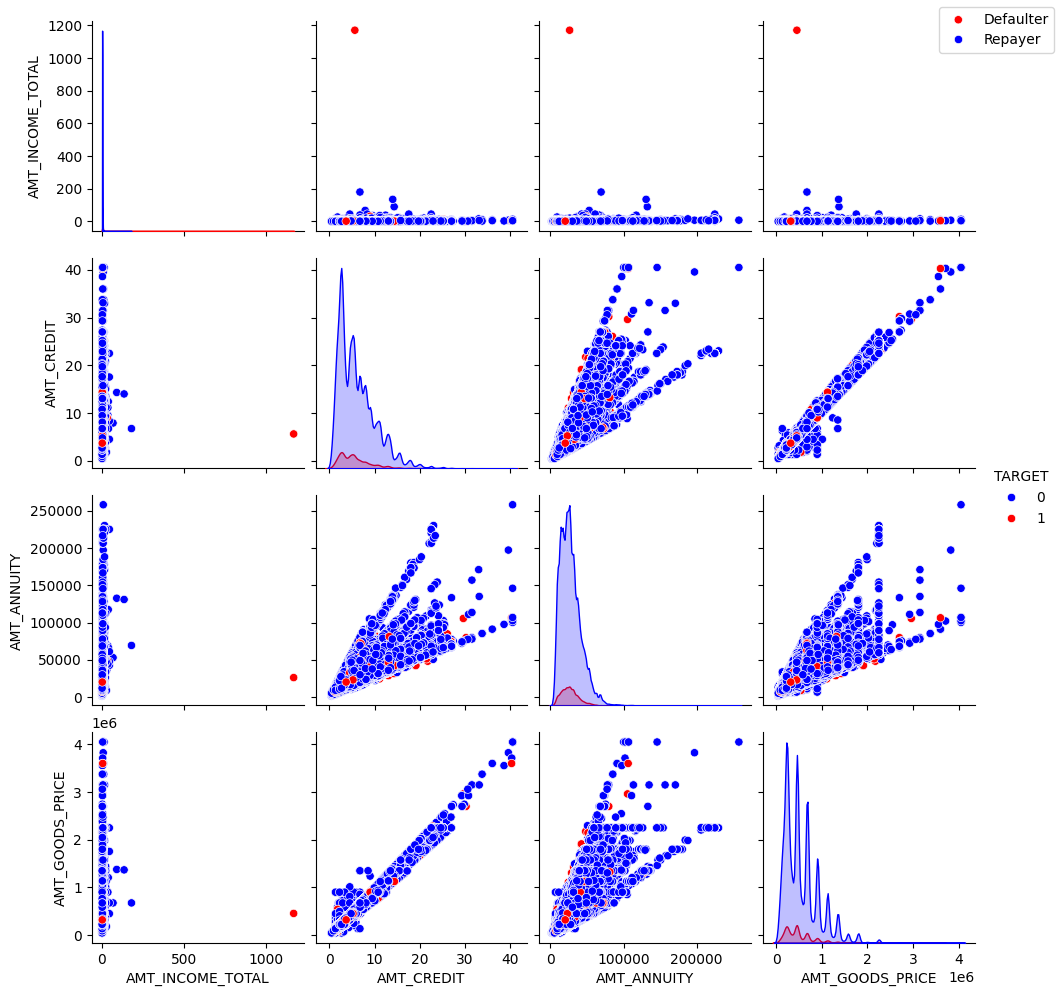

In [ ]:
# Plotting pairplot between amount variable to draw reference against loan repayment status

amount = appDF[[ 'AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
amount = amount[(amount["AMT_GOODS_PRICE"].notnull()) & (amount["AMT_ANNUITY"].notnull())]

ax= sns.pairplot(amount,hue="TARGET",palette=["b","r"])
ax.fig.legend(labels=['Defaulter','Repayer'])
plt.show()

**Inferences:**
* **When Annuity Amount > 15K and Good Price Amount > 20 Lakhs, there is a lesser chance of defaulters**
* **Loan Amount(AMT_CREDIT) and Goods price(AMT_GOODS_PRICE) are highly correlated as based on the scatterplot where most of the data are consolidated in form of a line**
* **There are very less defaulters for AMT_CREDIT >20 Lakhs**

## Merged Dataframes Analysis

In [ ]:
# merge both the dataframe on SK_ID_CURR with Inner Joins
loan_df = pd.merge(appDF, prevDF, how='inner', on='SK_ID_CURR')
loan_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS REGION_RATING_CLIENT REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION REG_REGION_NOT_WORK_REGION LIVE_REGION_NOT_WORK_REGION REG_CITY_NOT_LIVE_CITY REG_CITY_NOT_WORK_CITY LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_3  AMT_REQ_CREDIT_BUREAU_HOUR  AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR AMT_INCOME_RANGE AMT_CREDIT_RANGE  AGE AGE_GROUP  YEAR_EMPLOYED EMPLOYEE_TENURE  SK_ID_PREV NAME_CONTRACT_TYPE_y  AMT_ANNUITY_y  AMT_APPLICATION  AMT_CREDIT_y  AMT_GOODS_PRICE_y NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION YEARLY_DECISION
0      100002       1           Cash loans           M            N               Y             0             2.025      4.065975        24700.5           351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801        9461            637             3648.0             2120        Laborers              1.0                    2                           2                  WEDNESDAY                       10                           0                          0                           0                      0                      0                       0  Business Entity Type 3                       2.0                       2.0                       2.0                       2.0                 -1134.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         1.0        200k-300k        400k-500k   25     20-30              1             0-5     1038818       Consumer loans       9251.775         179055.0      179055.0           179055.0                    XAP             Approved            606                    XNA                XAP              New              Vehicles            POS               XNA                    Stone               500       Auto technology         24.0       low_normal      POS other with interest               2
1      100003       0           Cash loans           F            N               N             0             2.700     12.935025        35698.5          1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541       16765           1188             1186.0              291      Core staff              2.0                    1                           1                     MONDAY                       11                           0                          0                           0                      0                      0                       0                  School                       1.0                       0.0                       1.0                       0.0                  -828.0                1                         0.0                        0.0                         0.0                        0.0                        0.0                         0.0        200k-300k         1M Above   45     40-50              3             0-

In [ ]:
loan_df.shape

(1413701, 74)

In [ ]:
# Bisecting the "loan_df" dataframe based on Target value 0 and 1 for correlation and other analysis

repayer=loan_df[loan_df['TARGET']==0]
defaulter=loan_df[loan_df['TARGET']==1]

**Plotting Contract Status vs purpose of the loan**

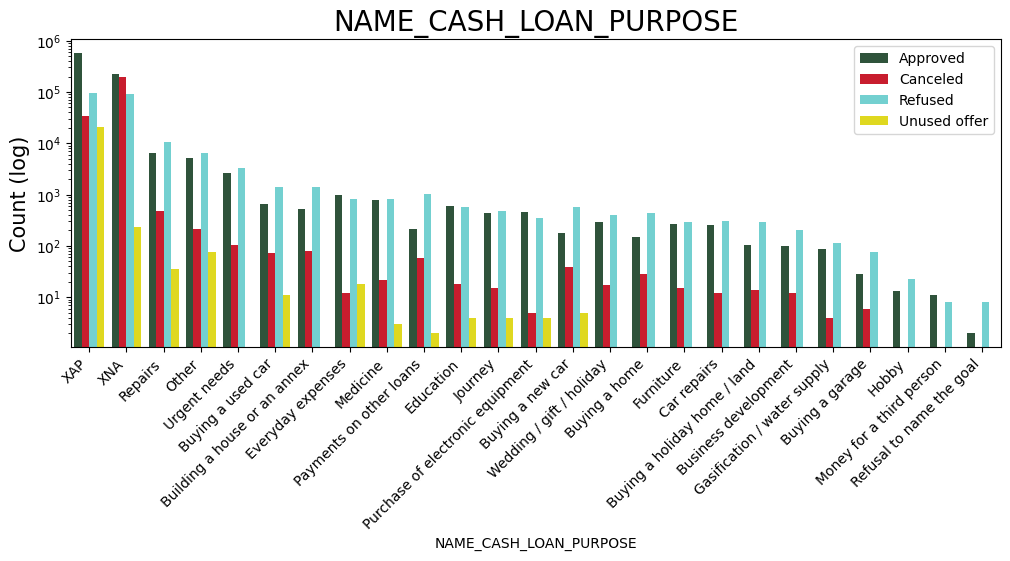

In [ ]:
univariate_c_merged('NAME_CASH_LOAN_PURPOSE', repayer, 'NAME_CONTRACT_STATUS',["#295939","#e40017","#64dfdf","#fff600"],True,(12,4))

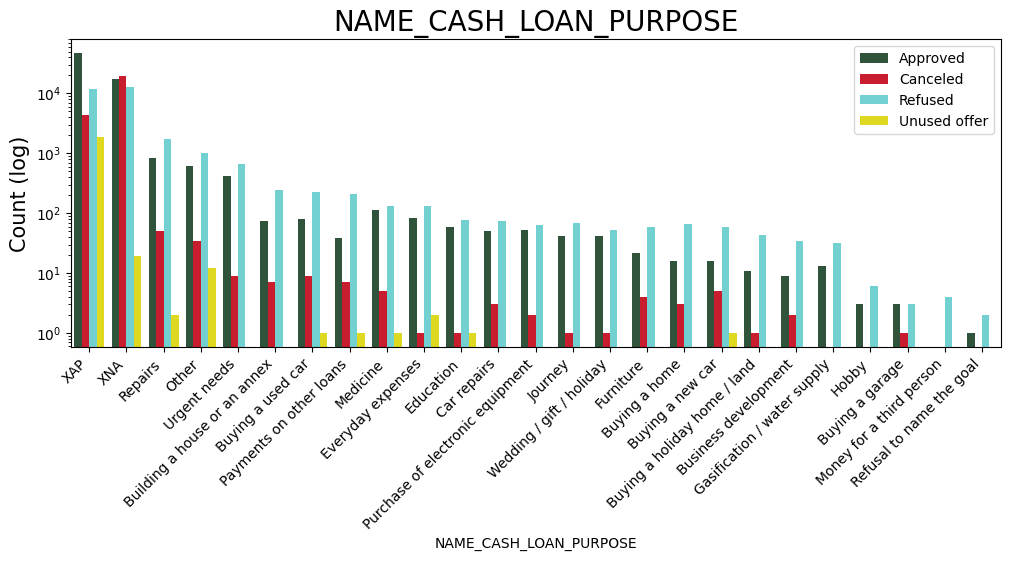

In [ ]:
univariate_c_merged('NAME_CASH_LOAN_PURPOSE', defaulter, 'NAME_CONTRACT_STATUS',["#295939","#e40017","#64dfdf","#fff600"],True,(12,4))

**Inferences:**
* **Loan purpose has high number of unknown values (XAP, XNA)**
* **Loan taken for the purpose of Repairs looks to have highest default rate**
* **Huge number application have been rejected by bank or refused by client which are applied for Repair or Other. from this we can infer that repair is considered high risk by bank. Also, either they are rejected or bank offers loan on high interest rate which is not feasible by the clients and they refuse the loan.**

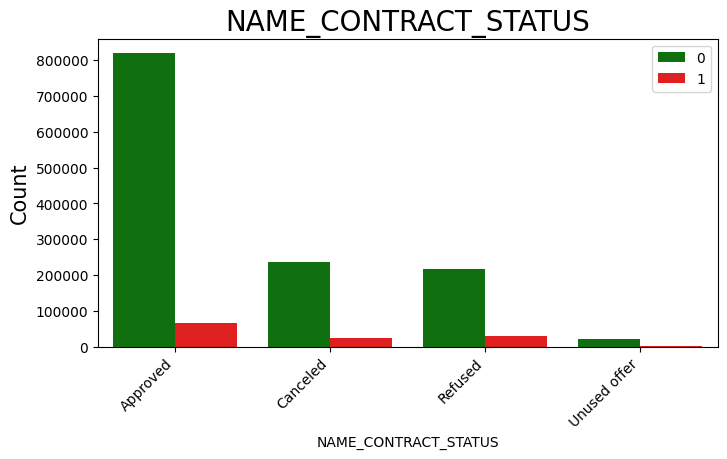

Count Percentage
NAME_CONTRACT_STATUS TARGET                   
Approved             0       818856     92.41%
                     1        67243      7.59%
Canceled             0       235641     90.83%
                     1        23800      9.17%
Refused              0       215952      88.0%
                     1        29438      12.0%
Unused offer         0        20892     91.75%
                     1         1879      8.25%

In [ ]:
# Checking Contract Status based on loan repayment status whether there is any business loss or financial loss
univariate_c_merged("NAME_CONTRACT_STATUS",loan_df,"TARGET",['g','r'],False,(8,4))
r=loan_df.groupby('NAME_CONTRACT_STATUS')['TARGET']
df1=pd.concat([r.value_counts(), round(r.value_counts(normalize=True)*100,2)],axis=1, keys=('Count', 'Percentage'))
df1['Percentage']=df1['Percentage'].astype(str)+'%'
df1

**Inferences:**
* **90% of the previously cancelled client have actually repayed the loan. Revising the interest rates would increase business opportunity for these clients**
* **88% of the clients who have been previously refused a loan has payed back the loan in current case.**
* **Refusal reason should be recorded for further analysis as these clients could turn into potential repaying customer.**

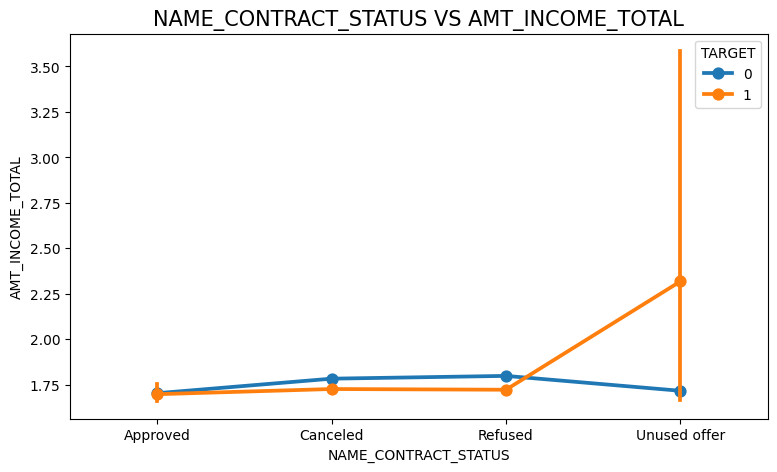

In [ ]:
# plotting the relationship between income total and contact status

pointplot(loan_df,"TARGET","NAME_CONTRACT_STATUS",'AMT_INCOME_TOTAL')

**Inferences:**
* **The point plot show that the people who have not used offer earlier have defaulted even when there average income is higher than others**

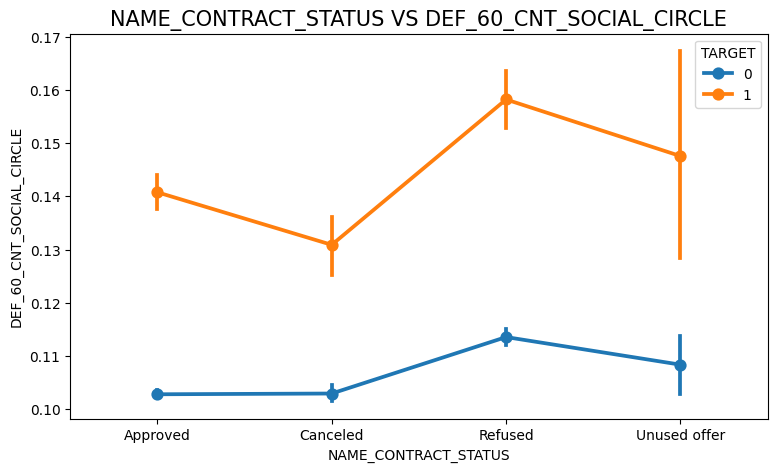

In [ ]:
# plotting the relationship between people who defaulted in last 60 days being in client's social circle and contact status

pointplot(loan_df,"TARGET","NAME_CONTRACT_STATUS",'DEF_60_CNT_SOCIAL_CIRCLE')

**Inferences:**
* **Clients who have average of 0.13 or higher their DEF_60_CNT_SOCIAL_CIRCLE score tend to default more and thus analysing client's social circle could help in disbursment of the loan.**

# **Conclusions**

### After analysing the datasets, there are few attributes of a client with which the bank would be able to identify if they will repay the loan or not. The analysis is consised as below with the contributing factors and categorization:

### A. Decisive Factor whether an applicant will be Repayer:
1. **NAME_EDUCATION_TYPE: Academic degree has less defaults.**
2. **NAME_INCOME_TYPE: Student and Businessmen have no defaults.**
3. **REGION_RATING_CLIENT: RATING 1 is safer.**
4. **ORGANIZATION_TYPE: Clients with Trade Type 4 and 5 and Industry type 8 have defaulted less than 3%**
5. **DAYS_BIRTH: People above age of 50 have low probability of defaulting**
6. **DAYS_EMPLOYED: Clients with 40+ year experience having less than 1% default rate**
7. **AMT_INCOME_TOTAL:Applicant with Income more than 700,000 are less likely to default**
8. **NAME_CASH_LOAN_PURPOSE: Loans bought for Hobby, Buying garage are being repayed mostly.**
9. **CNT_CHILDREN: People with zero to two children tend to repay the loans.**

### B. Decisive Factor whether an applicant will be Defaulter:
1. **CODE_GENDER: Men are at relatively higher default rate**
2. **NAME_FAMILY_STATUS : People who have civil marriage or who are single default a lot.**
3. **NAME_EDUCATION_TYPE: People with Lower Secondary & Secondary education**
4. **NAME_INCOME_TYPE: Clients who are either at Maternity leave OR Unemployed default a lot.**
5. **REGION_RATING_CLIENT: People who live in Rating 3 has highest defaults.**
6. **OCCUPATION_TYPE: Avoid Low-skill Laborers, Drivers and Waiters/barmen staff, Security staff, Laborers and Cooking staff as their default rate is huge.**
7. **ORGANIZATION_TYPE: Organizations with highest percent of loans not repaid are Transport: type 3 (16%), Industry: type 13 (13.5%), Industry: type 8 (12.5%) and Restaurant (less than 12%). Self-employed people have relative high defaulting rate, and thus should be avoided to be approved for loan or provide loan with higher interest rate to mitigate the risk of defaulting.**
8. **DAYS_BIRTH: Avoid young people who are in age group of 20-40 as they have higher probability of defaulting**
9. **DAYS_EMPLOYED: People who have less than 5 years of employment have high default rate.**
10. **CNT_CHILDREN & CNT_FAM_MEMBERS: Client who have children equal to or more than 9 default 100% and hence their applications are to be rejected.**
11. **AMT_GOODS_PRICE: When the credit amount goes beyond 3lakhs, there is an increase in defaulters.**

### C. Factors that Loan can be given on Condition of High Interest rate to mitigate any default risk leading to business loss:


1. **NAME_HOUSING_TYPE: High number of loan applications are from the category of people who live in Rented apartments & living with parents and hence offering the loan would mitigate the loss if any of those default.**
2. **AMT_CREDIT: People who get loan for 3-6 Lakhs tend to default more than others and hence having higher interest specifically for this credit range would be ideal.**
3. **AMT_INCOME: Since 90% of the applications have Income total less than 3Lakhs and they have high probability of defaulting, they could be offered loan with higher interest compared to other income category.**
4. **CNT_CHILDREN & CNT_FAM_MEMBERS: Clients who have 4 to 8 children has a very high default rate and hence higher interest should be imposed on their loans.**
5. **NAME_CASH_LOAN_PURPOSE: Loan taken for the purpose of Repairs seems to have highest default rate. A very high number applications have been rejected by bank or refused by client in previous applications as well which has purpose as repair or other. This shows that purpose repair is taken as high risk by bank and either they are rejected, or bank offers very high loan interest rate which is not feasible by the clients, thus they refuse the loan. The same approach could be followed in future as well.**

### D. Suggestions:
* **90% of the previously cancelled client have actually repayed the loan. Record the reason for cancellation which might help the bank to determine and negotiate terms with these repaying customers in future for increase business opportunity.**
* **88% of the clients who were refused by bank for loan earlier have now turned into a repaying client. Hence documenting the reason for rejection could mitigate the business loss and these clients could be contacted for further loans.**